# Plotting different traces

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os

from JUSUFlike.Project.Codes.processing_results import *
from IPython.display import Image
import tvb_model_reference.src.nuu_tools_simulation_human as tools
from sklearn.cluster import KMeans
from scipy import signal

from matplotlib import ticker


SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"]})

fig_labels = ['$S$', '$b_e$ (pA)', '$E_{L,i}$ (mV)', '$E_{L,e}$ (mV)', '$T$ (ms)']

c:\users\david\appdata\local\programs\python\python38\lib\site-packages\tvb\datatypes\surfaces.py:64: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


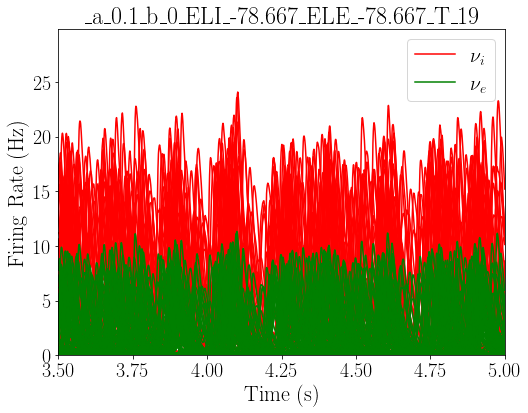

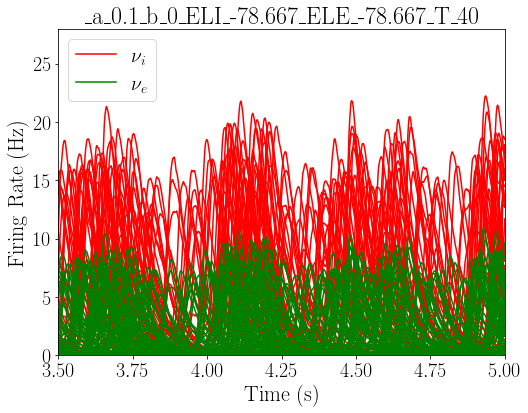

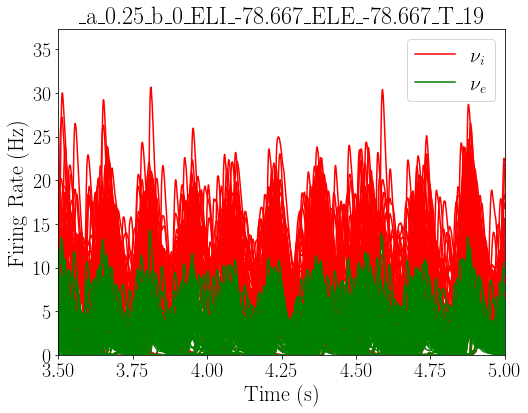

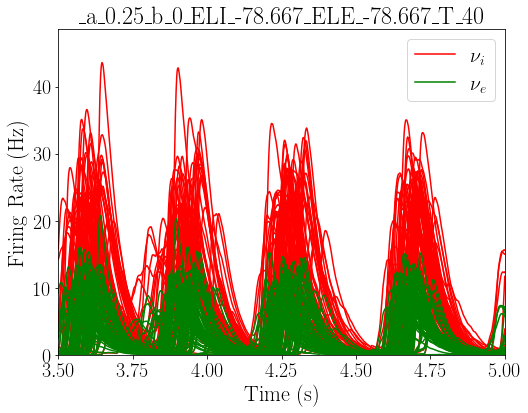

KeyboardInterrupt: 

In [3]:
coeff_inh = 1
E_L_i = -78.667
E_L_e = -78.667
run_sim = 5000.0
cut_transient = 2000.0
ELS = f'ELI_{E_L_i}_ELE_{E_L_e}'
folder_results = f'/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results_for_plotting/coeff_inh{coeff_inh}/' \
+ ELS + '/'
folder_figures = '/home/master/Desktop/tests_hpc/figures/parameter_plotting/'
for file in os.scandir(folder_results):
    # Then the sweeps
    name = file.name
    result = tools.get_result(file.path, cut_transient, run_sim)
    time_s = result[0][0] * 1e-3  # from ms to sec

    # Decide which one to analyze since they usually exhibit very similar behavior
    FR_exc = result[0][1][:, 0, :] * 1e3  # from KHz to Hz; Excitatory firing rate
    FR_inh = result[0][1][:, 1, :] * 1e3  # from KHz to Hz; Inhibitory firing rate
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(time_s, FR_inh[:], c='r')
    ax.plot(time_s, FR_exc[:], c='g')
    ax.plot([], [], label='$\\nu_i$', c='r')
    ax.plot([], [], label='$\\nu_e$', c='g')
    ax.legend(loc='best')
    ax.set(title=name, xlabel='Time (s)', ylabel='Firing Rate (Hz)',
           xlim=(3.5, 5), ylim=(0, 5 + max([np.amax(FR_exc), np.amax(FR_inh)])))
    fig.savefig(folder_figures + name + '.png')
    plt.show()

In [ ]:
coeff_inh = 1
E_L_i = -78.667
E_L_e = -78.667
run_sim = 5000.0
cut_transient = 2000.0
ELS = f'ELI_{E_L_i}_ELE_{E_L_e}'
folder_results = f'/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results_for_plotting/coeff_inh{coeff_inh}/' \
+ ELS + '/'
folder_figures = '/home/master/Desktop/tests_hpc/figures/parameter_plotting/'
for file in os.scandir(folder_results):
    # Then the sweeps
    name = file.name
    if '_a_0_' in name:
        result = tools.get_result(file.path, cut_transient, run_sim)
        time_s = result[0][0] * 1e-3  # from ms to sec

        # Decide which one to analyze since they usually exhibit very similar behavior
        FR_exc = result[0][1][:, 0, :] * 1e3  # from KHz to Hz; Excitatory firing rate
        FR_inh = result[0][1][:, 1, :] * 1e3  # from KHz to Hz; Inhibitory firing rate
        W = result[0][1][:, 5, :]

        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        ax = axes[0]
        ax.plot(time_s, FR_inh[:, 0], c='r')
        ax.plot(time_s, FR_exc[:, 0], c='g')
        ax.plot([], [], label='$\\nu_i$', c='r')
        ax.plot([], [], label='$\\nu_e$', c='g')
        ax.legend(loc='best')
        ax.set(title=name, xlabel='Time (s)', ylabel='Firing Rate (Hz)',
               xlim=(2, 5), ylim=(0, 5 + max([np.amax(FR_exc), np.amax(FR_inh)])))
        ax = axes[1]
        ax.plot(time_s, W[:, 0], c='y')
        ax.set_title('Excitatory adaptation')
        fig.savefig(folder_figures + name + '.png')
        plt.show()

# Plots for FENS Poster
What I want to do in this case is to plot the signals, PSD, FC and PLI of each of the already simulated points of the parameter space.

_a_0.3_b_0.0_ELI_-64_ELE_-64_T_19


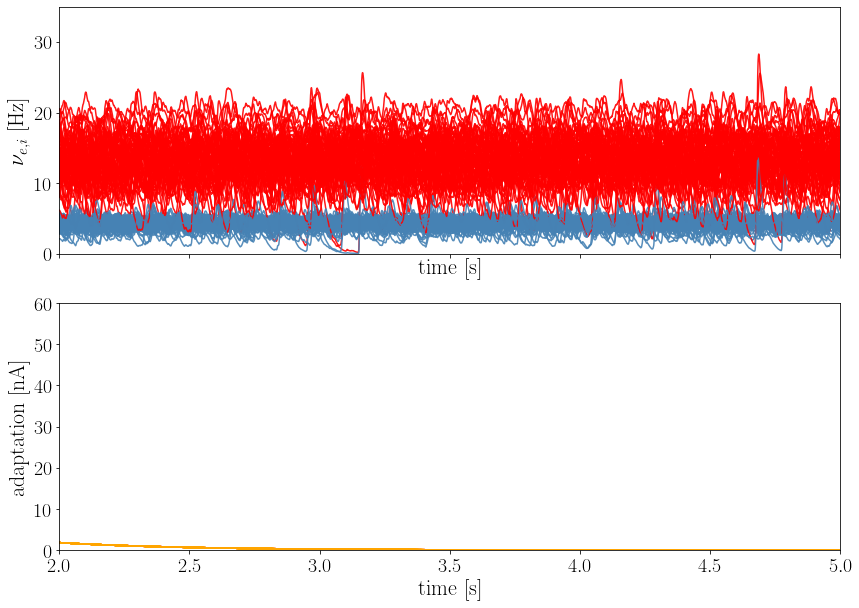

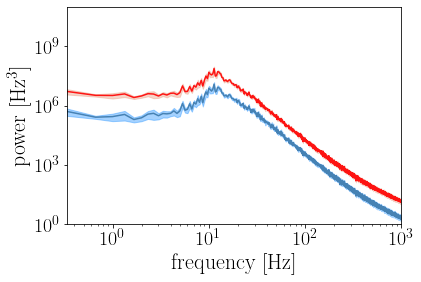

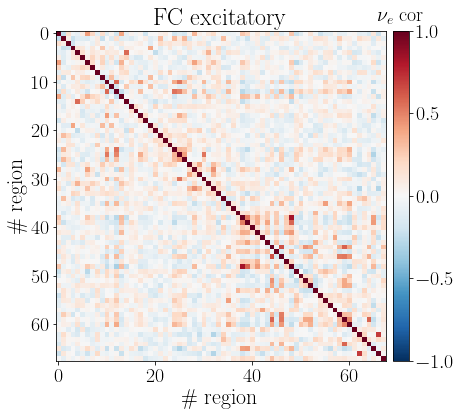

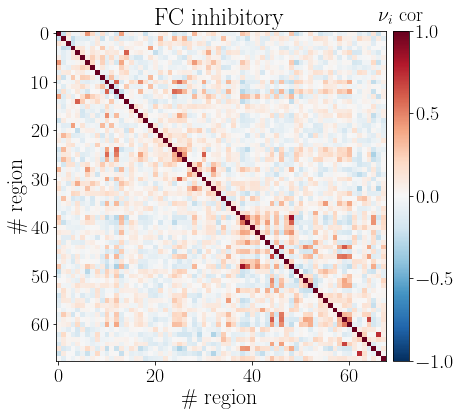

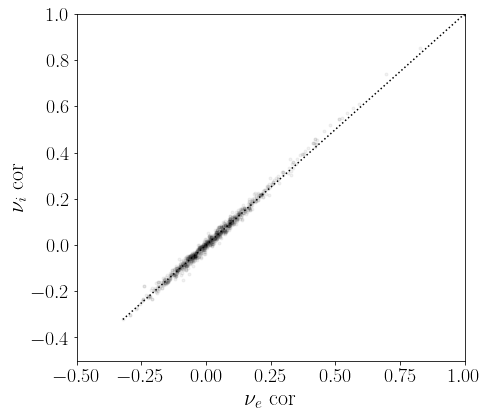

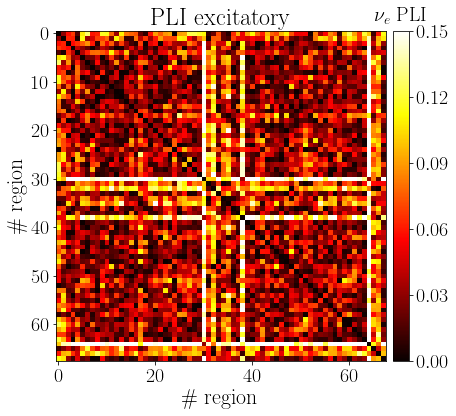

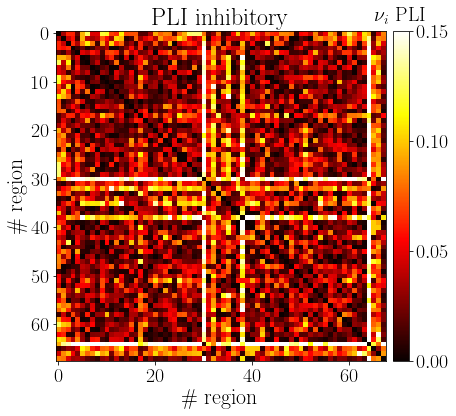

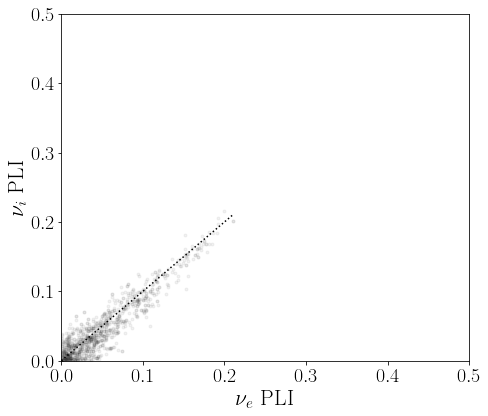

_a_0.3_b_48.0_ELI_-64_ELE_-64_T_19


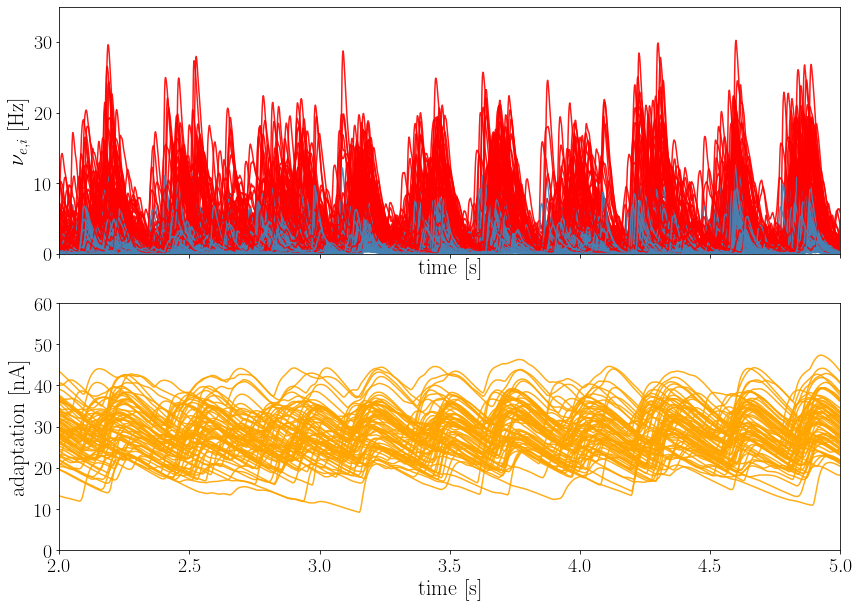

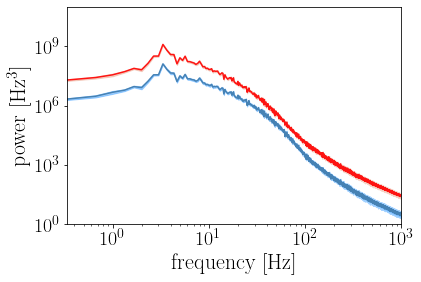

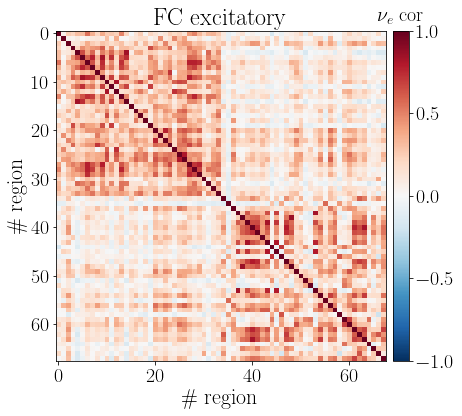

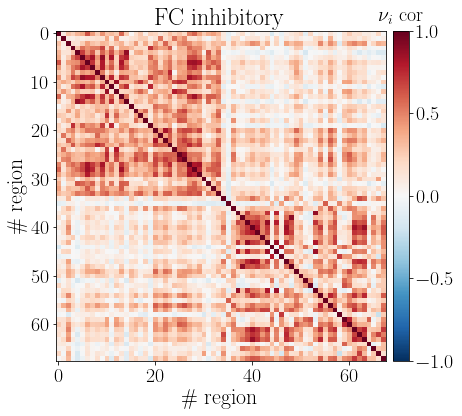

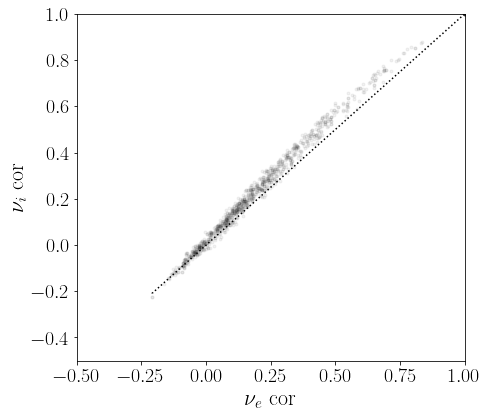

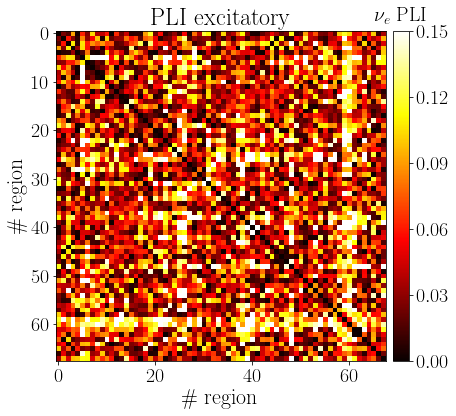

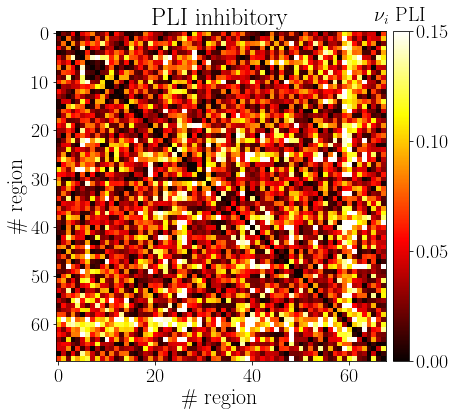

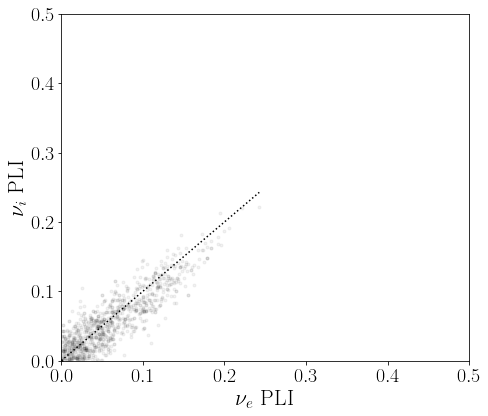

_a_0.3_b_72.0_ELI_-64_ELE_-64_T_19


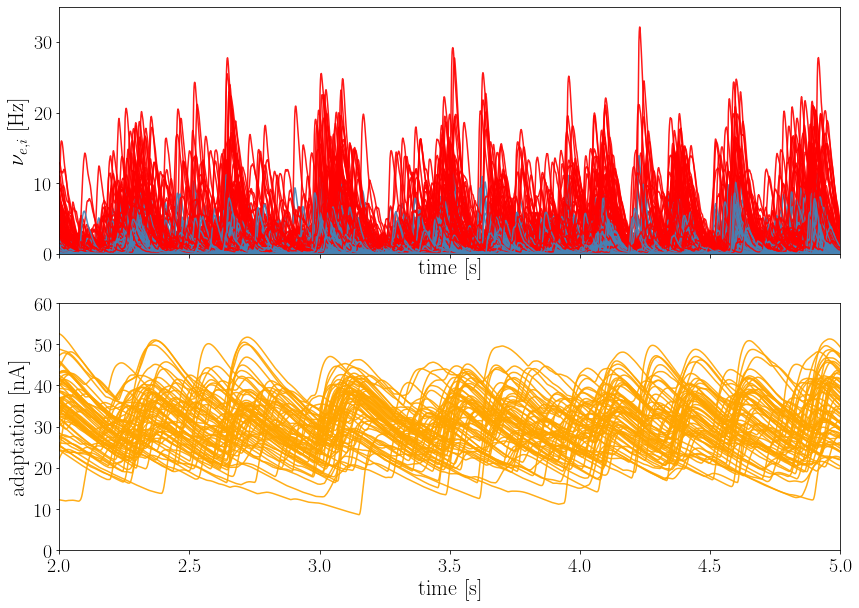

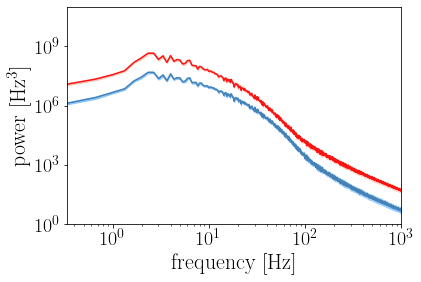

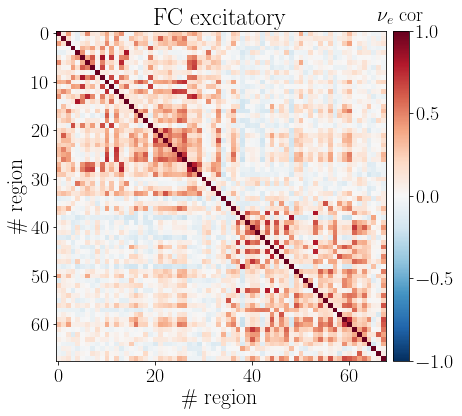

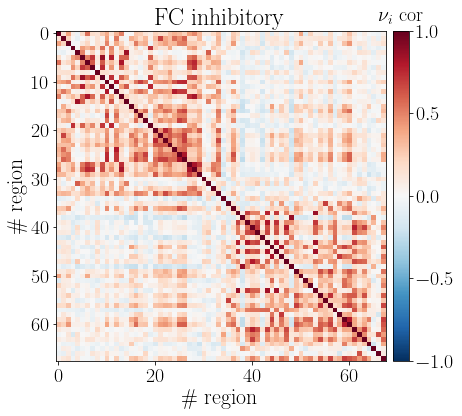

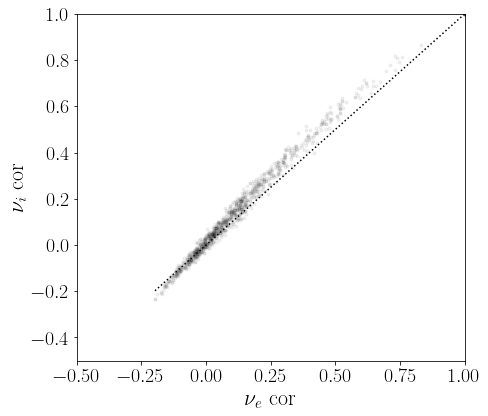

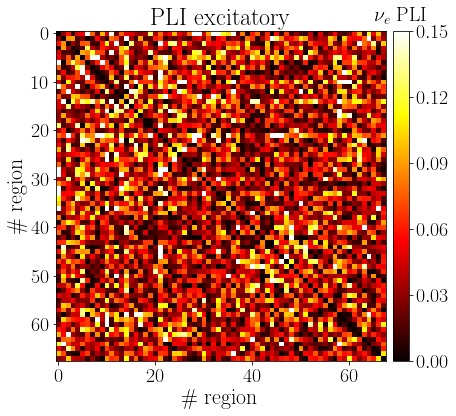

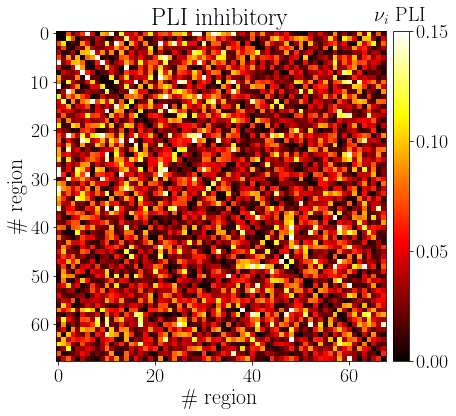

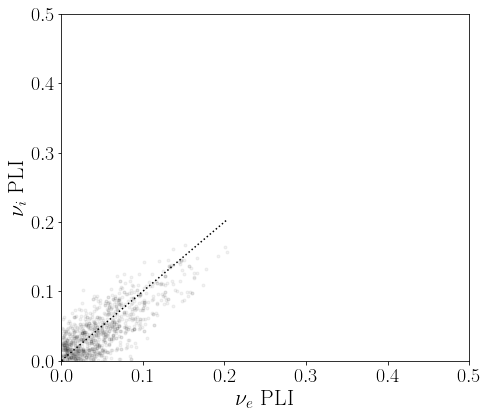

In [10]:
cut_transient = 2000 #time to discard after initialization
end = 5000
nnodes = 68
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"]})


figure_folder_all = './figures/poster_FENS/'
folder_data = 'P:/Internship/Data/figures_article/'

for file in os.scandir(folder_data):
    if ('_a_0.0' in file.name) or ('_T_12' in file.name):
        continue
    else:
        figure_folder = figure_folder_all + file.name
        # Make a folder for each parameter combination
        try:
            os.listdir(figure_folder)
        except:
            os.mkdir(figure_folder)
        print(file.name)
        # Load results
        result = tools.get_result(file.path,cut_transient+0.1,end)
        # Variables
        times = result[0][0]
        rateE = result[0][1][:,0,:]
        rateI = result[0][1][:,1,:]
        adaptationE = result[0][1][:,5,:]
        
        Esig = np.transpose(rateE)*1e3 #KHz to Hz
        Isig = np.transpose(rateI)*1e3
        AdpE = np.transpose(adaptationE)
        time_s = times*1e-3 #from ms to sec
        
        # Time traces figure
        fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(14,10), sharex=True)
        plt.rcParams.update({'font.size': 14})

        for e_node in range(nnodes):
            ax0.plot(time_s,Isig[e_node], '-r', alpha=0.9)
            ax0.plot(time_s,Esig[e_node], color='SteelBlue', alpha=0.9) 
        ax0.set_xlabel('time [s]')
        ax0.set_ylabel('$\\nu_{e, i}$ [Hz]')  
        ax0.set_ylim(ymax=35,ymin=0.)
        ax0.set_xlim(xmax=5., xmin=2.)

        for e_node in range(nnodes):
            ax1.plot(time_s,AdpE[e_node], color='#FFA500', alpha=0.9) 
        ax1.set_xlabel('time [s]')
        ax1.set_ylabel('adaptation [nA]')  
        ax1.set_ylim(ymax=60,ymin=0.)
        plt.savefig(figure_folder + '/time_traces.pdf', bbox_inches='tight')
        plt.show()
        plt.close()
        
        # Now PSD
        plt.rcParams.update({'font.size': 14})
        # plot power spectrum mean over regions and std
        f_sampling = 1.*len(time_s)/time_s[-1] # time in seconds, f_sampling in Hz
        f_sampling = 10000.0

        frq = np.fft.fftfreq(len(times), 1/f_sampling)

        # Excitatory
        pwr_region_E = []
        for e_reg in range(nnodes):
            pwr_region_E.append(np.abs(np.fft.fft(Esig[e_reg]))**2)

        mean_fft_overregions_E = np.mean(pwr_region_E, axis=0)
        mean_E_Hz = mean_fft_overregions_E
        plt.loglog(frq[frq > 0], mean_E_Hz[frq > 0], color='SteelBlue')
        std_e = np.std(pwr_region_E, axis=0) #std fft between regions
        high_e = mean_E_Hz[frq > 0]+std_e[frq > 0]/np.sqrt(nnodes)
        low_e =  mean_E_Hz[frq > 0]-std_e[frq > 0]/np.sqrt(nnodes)
        plt.fill_between(frq[frq > 0], high_e, low_e, color = 'DodgerBlue', alpha = 0.4)

        # Inhibitory
        pwr_region_I = []
        for i_reg in range(nnodes):
            pwr_region_I.append(np.abs(np.fft.fft(Isig[i_reg]))**2)

        mean_fft_overregions_I = np.mean(pwr_region_I, axis=0)
        mean_I_Hz = mean_fft_overregions_I
        plt.loglog(frq[frq > 0], mean_I_Hz[frq > 0], '-r', alpha=0.9)
        std_i = np.std(pwr_region_I, axis=0) #std fft between regions
        high_i = mean_I_Hz[frq > 0]+std_i[frq > 0]/np.sqrt(nnodes)
        low_i =  mean_I_Hz[frq > 0]-std_i[frq > 0]/np.sqrt(nnodes)
        plt.fill_between(frq[frq > 0], high_i, low_i, color = 'DarkSalmon', alpha = 0.4)

        plt.xlabel('frequency [Hz]')
        #plt.xlabel(r'$\nu_E [Hz]$')
        plt.ylabel('power [Hz$^3$]')  
        plt.xlim(np.amin(frq[frq > 0]), 1000)
        plt.ylim(10e-1, 10e10)
        #plt.legend(['excitatory', 'inhibitory'])
        plt.savefig(figure_folder + '/PSD.pdf', bbox_inches='tight')
        plt.show()
        plt.close()
        
        # Now FC
        fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(7,6))
        plt.rcParams.update({'font.size': 14})
        pearson_e = np.corrcoef(Esig)
        im0 = ax0.imshow(pearson_e, cmap = 'RdBu_r', vmin = -1, vmax = 1, 
                   interpolation = 'nearest')
        
        divider = make_axes_locatable(ax0)
        cax0 = divider.append_axes("right", size="5%", pad=0.1)
        clb = fig.colorbar(im0, cax=cax0)
        clb.ax.set_title('$\\nu_e$ cor', fontsize=20, pad=10)
        ax0.set_xlabel('$\#$ region') 
        ax0.set_ylabel('$\#$ region') 
        ax0.set_title('FC excitatory')
        tick_locator = ticker.MaxNLocator(nbins=4)
        clb.locator = tick_locator
        clb.update_ticks()
        plt.tight_layout()
        plt.savefig(figure_folder + '/FC_e.pdf', bbox_inches='tight')
        plt.show()
        plt.close()

        #inhibitory
        fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(7,6))
        pearson_i = np.corrcoef(Isig)
        im1 = ax1.imshow(pearson_i, cmap = 'RdBu_r', vmin = -1, vmax = 1, 
                   interpolation = 'nearest')
        
        divider = make_axes_locatable(ax1)
        cax1 = divider.append_axes("right", size="5%", pad=0.1)
        clb = fig.colorbar(im1, cax=cax1)
        clb.ax.set_title('$\\nu_i$ cor', fontsize=20, pad=10)
        
        ax1.set_xlabel('$\#$ region')
        ax1.set_ylabel('$\#$ region') 
        ax1.set_title('FC inhibitory')
        
        tick_locator = ticker.MaxNLocator(nbins=4)
        clb.locator = tick_locator
        clb.update_ticks()
        
        plt.tight_layout()
        plt.savefig(figure_folder + '/FC_i.pdf', bbox_inches='tight')
        plt.show()
        plt.close()
        
        ## Now the relationship between the nue and nui correlations:
        fig, ax_cor = plt.subplots(nrows=1, ncols=1, figsize=(7,6))
        # We perform a random sampling to facilitate plotting and working with inscape
        n = 1000  # for 2 random indices
        index = np.random.choice(np.concatenate(pearson_e).shape[0], n, replace=False)
        
        ax_cor.plot(np.concatenate(pearson_e)[index], 
                    np.concatenate(pearson_i)[index], 'k.', alpha=0.05)
        ax_cor.plot(np.sort(np.concatenate(pearson_e)[index]),
                    np.sort(np.concatenate(pearson_e)[index]),'k:')
        ax_cor.set(xlim=(-0.5,1.0), ylim=(-0.5,1.0), xlabel = '$\\nu_e$ cor', ylabel='$\\nu_i$ cor') 
        plt.tight_layout()
        plt.savefig(figure_folder + '/cor_e_i.pdf', bbox_inches='tight')
        plt.show()
        plt.close()
        
        # Finally PLI
        fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(7,6))
        plt.rcParams.update({'font.size': 14})
        #excitatory
        hilb_phase_region_e = np.zeros_like(Esig)
        PLI_e = np.zeros((nnodes, nnodes))

        hilb_amplitude_region_e = np.zeros_like(Esig)
        hilb_phase_region_e = np.zeros_like(Esig)

        for e_reg in range(nnodes):
            hilb = signal.hilbert(Esig[e_reg])
            hilb_amplitude_region_e[e_reg] = np.abs(hilb)
            hilb_phase_region_e[e_reg] = np.angle(hilb)

        for e_reg in range(nnodes):
            for j_reg in range(e_reg, nnodes):
                phase_lags = hilb_phase_region_e[e_reg] \
                - hilb_phase_region_e[j_reg]
                PLI_e[e_reg][j_reg] = np.abs(np.mean(np.sign(phase_lags)))
                PLI_e[j_reg][e_reg] = PLI_e[e_reg][j_reg]

        im0 = ax0.imshow(PLI_e, cmap = 'hot', vmin = 0, vmax = 0.15, 
                   interpolation = 'nearest')
        divider = make_axes_locatable(ax0)
        cax0 = divider.append_axes("right", size="5%", pad=0.1)
        clb = fig.colorbar(im0, cax=cax0)
        clb.ax.set_title('$\\nu_e$ PLI', fontsize=20, pad=10)
        
        ax0.set_xlabel('$\#$ region')
        ax0.set_ylabel('$\#$ region') 
        ax0.set_title('PLI excitatory')
        
        tick_locator = ticker.MaxNLocator(nbins=5)
        clb.locator = tick_locator
        clb.update_ticks()
        
        plt.tight_layout()
        plt.savefig(figure_folder + '/PLI_e.pdf', bbox_inches='tight')
        plt.show()
        plt.close()
        
        #inhibitory
        fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(7,6))
        hilb_phase_region_i = np.zeros_like(Isig)
        PLI_i = np.zeros((nnodes, nnodes))

        hilb_amplitude_region_i = np.zeros_like(Isig)
        hilb_phase_region_i = np.zeros_like(Isig)

        for i_reg in range(nnodes):
            hilb = signal.hilbert(Isig[i_reg])
            hilb_amplitude_region_i[i_reg] = np.abs(hilb)
            hilb_phase_region_i[i_reg] = np.angle(hilb)

        for i_reg in range(nnodes):
            for j_reg in range(i_reg, nnodes):
                phase_lags = hilb_phase_region_i[i_reg] \
                - hilb_phase_region_i[j_reg]
                PLI_i[i_reg][j_reg] = np.abs(np.mean(np.sign(phase_lags)))
                PLI_i[j_reg][i_reg] = PLI_i[i_reg][j_reg]

        im1 = ax1.imshow(PLI_i, cmap = 'hot', vmin = 0, vmax = 0.15, 
                   interpolation = 'nearest')
        divider = make_axes_locatable(ax1)
        cax1 = divider.append_axes("right", size="5%", pad=0.1)
        clb = fig.colorbar(im1, cax=cax1)
        clb.ax.set_title('$\\nu_i$ PLI', fontsize=20, pad=10)
        ax1.set_xlabel('$\#$ region')
        ax1.set_ylabel('$\#$ region') 
        ax1.set_title('PLI inhibitory')
        
        tick_locator = ticker.MaxNLocator(nbins=3)
        clb.locator = tick_locator
        clb.update_ticks()
        
        plt.tight_layout()
        plt.savefig(figure_folder + '/PLI_i.pdf', bbox_inches='tight')
        plt.show()
        plt.close()
        
        ## Now the relationship between the nue and nui PLI:
        fig, ax_pli = plt.subplots(nrows=1, ncols=1, figsize=(7,6))
        
        plt.plot(np.concatenate(PLI_e)[index], np.concatenate(PLI_i)[index], 'k.', alpha=0.05)
        plt.plot(np.sort(np.concatenate(PLI_e)[index]),np.sort(np.concatenate(PLI_e)[index]),'k:')
        ax_pli.set(xlim=(0, 0.5), ylim=(0.0, 0.5), xlabel = '$\\nu_e$ PLI', ylabel='$\\nu_i$ PLI') 
        plt.tight_layout()
        plt.savefig(figure_folder + '/PLI_e_i.pdf', bbox_inches='tight')
        plt.show()
        plt.close()
        
        
        del result, phase_lags, pwr_region_E, pwr_region_I, times, rateE, rateI, Esig, Isig, hilb_phase_region_e, hilb_phase_region_i
        del hilb_amplitude_region_e, hilb_amplitude_region_i, hilb

# New Figure 5

Ttest Corr
Ttest_indResult(statistic=-0.9234160020126994, pvalue=0.3558145523627684)
0.05057549019607843
Ttest PLI
Ttest_indResult(statistic=4.282047844587187, pvalue=1.8705169997428492e-05)
Ttest Corr
Ttest_indResult(statistic=-8.470950908151366, pvalue=2.8063260619873284e-17)
0.0622421568627451
Ttest PLI
Ttest_indResult(statistic=5.047489667723132, pvalue=4.561820325436196e-07)


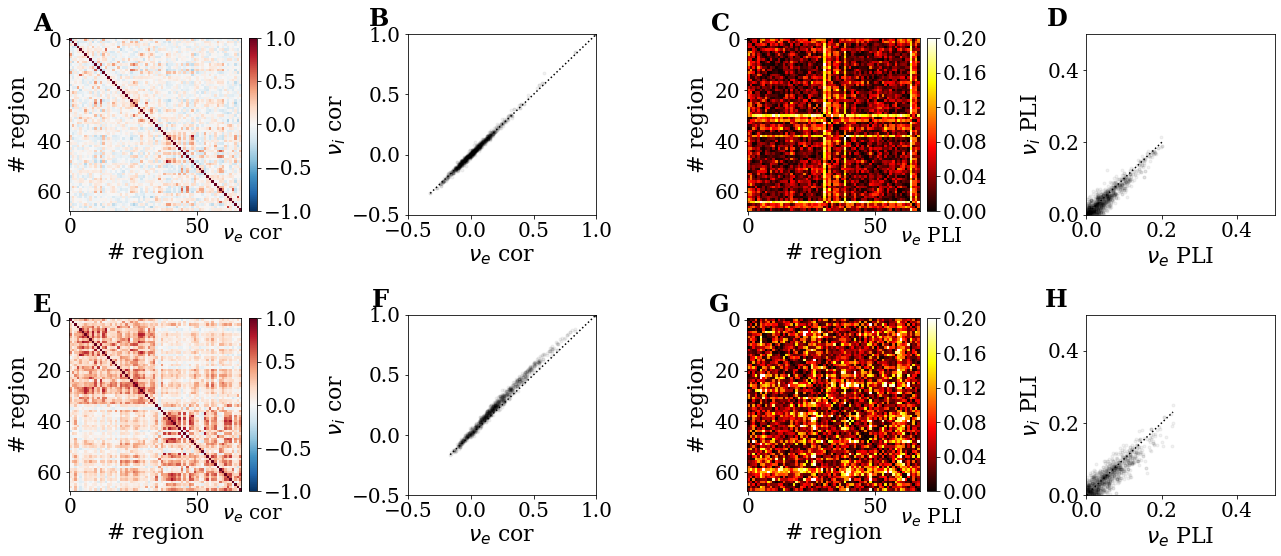

In [2]:
from scipy import stats

figure_folder_all = './figures/article_figures/'
folder_data = 'P:/Internship/Data/figures_article/'
cut_transient = 2000 #time to discard after initialization
end = 5000
nnodes = 68

fig = plt.figure(figsize=(18, 8))
for i, label in enumerate(('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H')):
    ax = fig.add_subplot(2,4,i+1)
    ax.text(-0.1, 1.15, label, transform=ax.transAxes,
      fontsize=24, fontweight='bold', va='top', ha='right')

ax = fig.axes
i = 0
count = 0
plis_e = []
fcs_e = []
plis_i = []
fcs_i = []

file_names = []
for file in os.scandir(folder_data):
    if ('_a_0.0' in file.name) or ('_T_12' in file.name) or ('b_72' in file.name):
        continue
    else:
        file_names.append(file.name)
        # Load results
        result = tools.get_result(file.path,cut_transient+0.1,end)
        # Variables
        times = result[0][0]
        rateE = result[0][1][:,0,:]
        rateI = result[0][1][:,1,:]
        adaptationE = result[0][1][:,5,:]
        
        Esig = np.transpose(rateE)*1e3 #KHz to Hz
        Isig = np.transpose(rateI)*1e3
        AdpE = np.transpose(adaptationE)
        time_s = times*1e-3 #from ms to sec
        
        # Now FC
        plt.rcParams.update({'font.size': 14})
        pearson_e = np.corrcoef(Esig)
        fcs_e.append(pearson_e)
        pearson_i = np.corrcoef(Isig)
        fcs_i.append(pearson_i)
        ax0 = ax[i]
        im0 = ax0.imshow(pearson_e, cmap = 'RdBu_r', vmin = -1, vmax = 1, 
                   interpolation = 'nearest')
        
        divider = make_axes_locatable(ax0)
        cax0 = divider.append_axes("right", size="5%", pad=0.1)
        clb = fig.colorbar(im0, cax=cax0)
        clb.ax.set_xlabel('$\\nu_e$ cor', fontsize=20, labelpad=15)
        ax0.set_xlabel('$\#$ region') 
        ax0.set_ylabel('$\#$ region') 

        tick_locator = ticker.MaxNLocator(nbins=4)
        clb.locator = tick_locator
        clb.update_ticks()
    
        i += 1
        ## Now the relationship between the nue and nui correlations:
        # We perform a random sampling to facilitate plotting and working with inscape
        ax_cor = ax[i]
        n = 1000  # for 2 random indices
        index = np.random.choice(np.concatenate(pearson_e).shape[0], n, replace=False)
        
        ax_cor.plot(np.concatenate(pearson_e)[index], 
                    np.concatenate(pearson_i)[index], 'k.', alpha=0.05)
        ax_cor.plot(np.sort(np.concatenate(pearson_e)[index]),
                    np.sort(np.concatenate(pearson_e)[index]),'k:')
        ax_cor.set(xlim=(-0.5,1.0), ylim=(-0.5,1.0), xlabel = '$\\nu_e$ cor', ylabel='$\\nu_i$ cor') 
        
        i += 1
        print('Ttest Corr')
        print(stats.ttest_ind(np.concatenate(pearson_e), np.concatenate(pearson_i)))
        
        # Finally PLI
        #excitatory
        hilb_phase_region_e = np.zeros_like(Esig)
        PLI_e = np.zeros((nnodes, nnodes))

        hilb_amplitude_region_e = np.zeros_like(Esig)
        hilb_phase_region_e = np.zeros_like(Esig)

        for e_reg in range(nnodes):
            hilb = signal.hilbert(Esig[e_reg])
            hilb_amplitude_region_e[e_reg] = np.abs(hilb)
            hilb_phase_region_e[e_reg] = np.angle(hilb)

        for e_reg in range(nnodes):
            for j_reg in range(e_reg, nnodes):
                phase_lags = hilb_phase_region_e[e_reg] \
                - hilb_phase_region_e[j_reg]
                PLI_e[e_reg][j_reg] = np.abs(np.mean(np.sign(phase_lags)))
                PLI_e[j_reg][e_reg] = PLI_e[e_reg][j_reg]
        plis_e.append(PLI_e)
        ax0 = ax[i]
        im0 = ax0.imshow(PLI_e, cmap = 'hot', vmin = 0, vmax = 0.20, 
                   interpolation = 'nearest')
        divider = make_axes_locatable(ax0)
        cax0 = divider.append_axes("right", size="5%", pad=0.1)
        clb = fig.colorbar(im0, cax=cax0)
        clb.ax.set_xlabel('$\\nu_e$ PLI', fontsize=20, labelpad=15)
        
        ax0.set_xlabel('$\#$ region')
        ax0.set_ylabel('$\#$ region') 
        
        tick_locator = ticker.MaxNLocator(nbins=5)
        clb.locator = tick_locator
        clb.update_ticks()
        
        print(np.mean(PLI_e))
        #inhibitory
        hilb_phase_region_i = np.zeros_like(Isig)
        PLI_i = np.zeros((nnodes, nnodes))

        hilb_amplitude_region_i = np.zeros_like(Isig)
        hilb_phase_region_i = np.zeros_like(Isig)

        for i_reg in range(nnodes):
            hilb = signal.hilbert(Isig[i_reg])
            hilb_amplitude_region_i[i_reg] = np.abs(hilb)
            hilb_phase_region_i[i_reg] = np.angle(hilb)

        for i_reg in range(nnodes):
            for j_reg in range(i_reg, nnodes):
                phase_lags = hilb_phase_region_i[i_reg] \
                - hilb_phase_region_i[j_reg]
                PLI_i[i_reg][j_reg] = np.abs(np.mean(np.sign(phase_lags)))
                PLI_i[j_reg][i_reg] = PLI_i[i_reg][j_reg]
        plis_i.append(PLI_i)
        i += 1
        ax_pli = ax[i]
        ## Now the relationship between the nue and nui PLI:
        ax_pli.plot(np.concatenate(PLI_e)[index], np.concatenate(PLI_i)[index], 'k.', alpha=0.05)
        ax_pli.plot(np.sort(np.concatenate(PLI_e)[index]),np.sort(np.concatenate(PLI_e)[index]),'k:')
        ax_pli.set(xlim=(0, 0.5), ylim=(0.0, 0.5), xlabel = '$\\nu_e$ PLI', ylabel='$\\nu_i$ PLI') 
        
        i += 1
        print('Ttest PLI')
        print(stats.ttest_ind(np.concatenate(PLI_e), np.concatenate(PLI_i)))
        del result, phase_lags, times, rateE, rateI, Esig, Isig, hilb_phase_region_e, hilb_phase_region_i
        del hilb_amplitude_region_e, hilb_amplitude_region_i, hilb
        
plt.tight_layout()
plt.show()
#fig.savefig(figure_folder_all + '/Fig5.pdf')

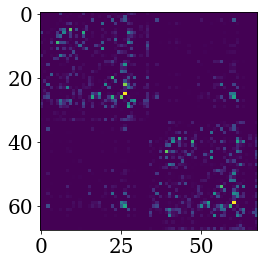

1376.4015


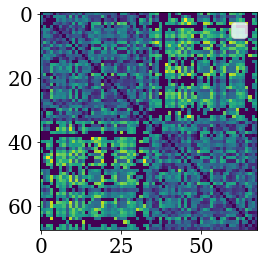

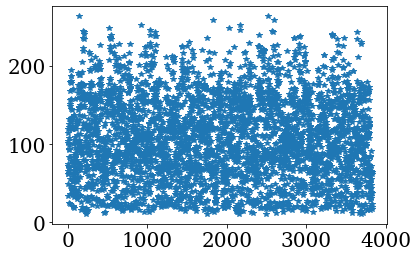

In [3]:
# Additional plots for the review
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

conn_folder = Path.joinpath(Path.cwd(), 'tvb_model_reference', 'data', 'QL_20120814_Connectivity')
weight_mat = np.loadtxt(Path.joinpath(conn_folder, 'weights.txt'))
tracts_mat = np.loadtxt(Path.joinpath(conn_folder, 'tract_lengths.txt'))

plt.imshow(weight_mat)
plt.show()
print(np.amax(weight_mat))
im = plt.imshow(tracts_mat)
plt.legend()
plt.show()

# Now make use of this information to plot the plots. I could also plot them by weight, to see the influence
# but I am sure it will pose more problems
plt.plot(tracts_mat[weight_mat != 0].flatten(), '*')

['_a_0.3_b_0.0_ELI_-64_ELE_-64_T_19', '_a_0.3_b_48.0_ELI_-64_ELE_-64_T_19']
5.455278573080464e-106
1.8815172477503652e-113
5.034887955494769e-143
6.149431916884246e-154


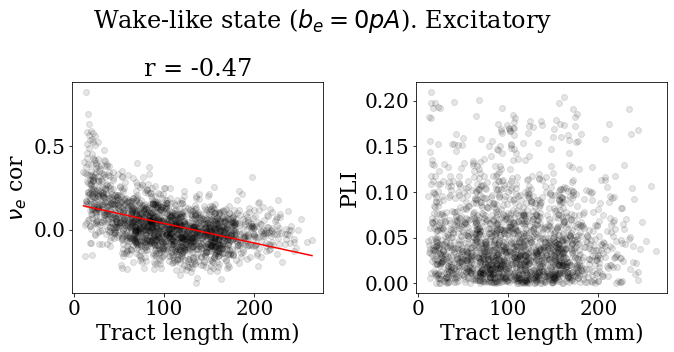

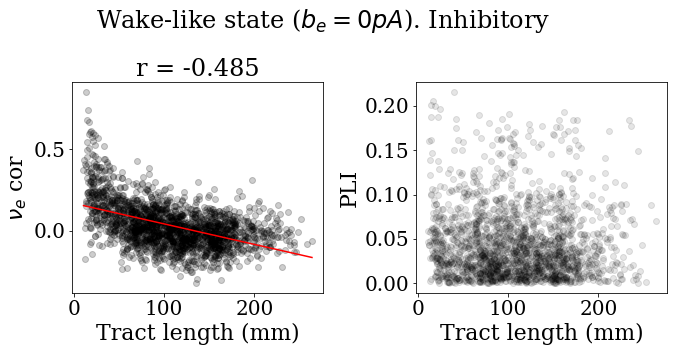

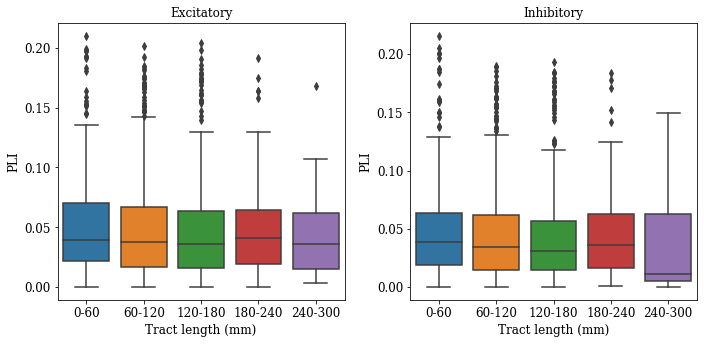

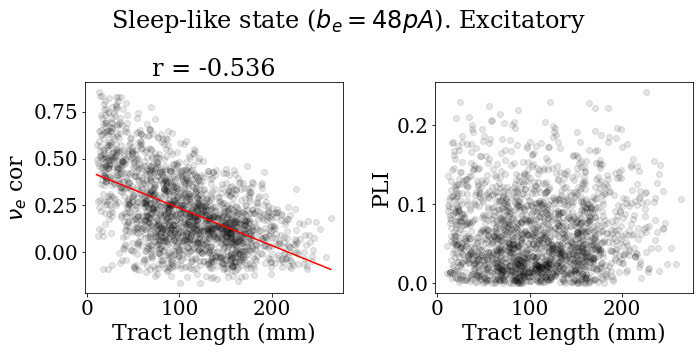

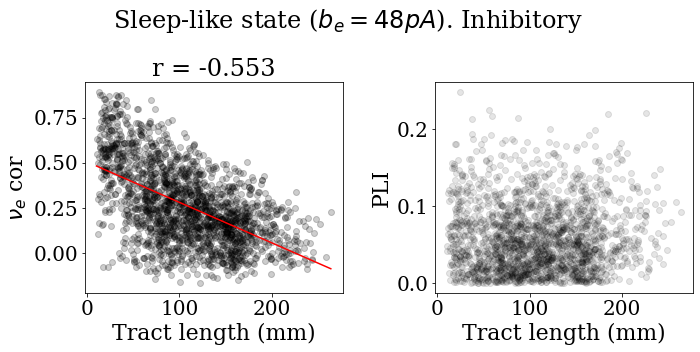

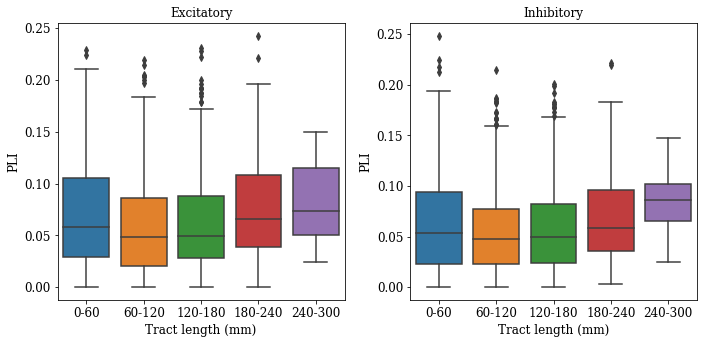

In [34]:
import scipy.stats
print(file_names)  # We have the awake and asleep conditions and the fc and plis matrix for each one.
idx_upper = np.triu_indices(weight_mat.shape[0], k = 1)  # We obtain the indexes of the upper triangular part

tracts_mat_plot = tracts_mat[idx_upper][weight_mat[idx_upper]!=0]
x_corr = np.linspace(np.amin(tracts_mat_plot), np.amax(tracts_mat_plot), 100)
# Since the matrices are symmetric, we will take the values above the diagonal and plot them together
states = ['Wake-like state ($b_e = 0pA$)', 'Sleep-like state ($b_e = 48pA$)']
figname = ['plicor_wake', 'plicor_sleep']
boxplots_name = ['pli_box_wake', 'pli_box_sleep']
for i, state in enumerate(file_names):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    ax = axes[0]
    fc_plot = fcs_e[i][idx_upper][weight_mat[idx_upper]!=0]
    result = scipy.stats.linregress(tracts_mat_plot, fc_plot)
    m = result.slope
    b = result.intercept
    ax.scatter(tracts_mat_plot, fc_plot, c='k', alpha=0.1)
    ax.plot(x_corr, m*x_corr + b, 'r')
    ax.set(xlabel='Tract length (mm)', ylabel='$\\nu_e$ cor', 
           title=f'r = {round(result.rvalue, 3)}')
    print(result.pvalue)
    #ax.set_xscale('log')
    ax = axes[1]
    ax.scatter(tracts_mat_plot, list(plis_e[i][idx_upper][weight_mat[idx_upper]!=0]), c='k', alpha=0.1)
    ax.set(xlabel='Tract length (mm)', ylabel='PLI')
    #ax.set_xscale('log')
    fig.suptitle(states[i] + '. Excitatory')
    plt.tight_layout()
    fig.savefig('./figures/' + figname[i] + '_e.pdf')
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    ax = axes[0]
    fc_plot = fcs_i[i][idx_upper][weight_mat[idx_upper]!=0]
    result = scipy.stats.linregress(tracts_mat_plot, fc_plot)
    m = result.slope
    b = result.intercept
    ax.scatter(tracts_mat_plot, fc_plot, c='k', alpha=0.1)
    ax.plot(x_corr, m*x_corr + b, 'r')
    ax.scatter(tracts_mat_plot, fc_plot, c='k', alpha=0.1)
    ax.set(xlabel='Tract length (mm)', ylabel='$\\nu_e$ cor', 
           title=f'r = {round(result.rvalue, 3)}')
    print(result.pvalue)
    #ax.set_xscale('log')
    ax = axes[1]
    ax.scatter(tracts_mat_plot, list(plis_i[i][idx_upper][weight_mat[idx_upper]!=0]), c='k', alpha=0.1)
    ax.set(xlabel='Tract length (mm)', ylabel='PLI')
    #ax.set_xscale('log')
    fig.suptitle(states[i] + '. Inhibitory')
    plt.tight_layout()
    fig.savefig('./figures/' + figname[i] + '_i.pdf')
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    n_bins = 5
    ax = axes[0]
    # Apply the bins here
    vec_tract = tracts_mat[idx_upper][weight_mat[idx_upper]!=0]
    pli_e = plis_e[i][idx_upper][weight_mat[idx_upper]!=0]
    pli_i = plis_i[i][idx_upper][weight_mat[idx_upper]!=0]
    ax = boxplots(vec_tract, pli_e, n_bins=n_bins, ax=ax)
    ax.set(xlabel='Tract length (mm)', ylabel='PLI', title='Excitatory')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(12)
    #ax.set_xscale('log')
    ax = axes[1]
    ax = boxplots(vec_tract, pli_i, n_bins=n_bins, ax=ax)
    ax.set(xlabel='Tract length (mm)', ylabel='PLI', title='Inhibitory')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(12)
    #ax.scatter(tracts_ma, list(plis_i[i][idx_upper]), c='k', alpha=0.1)
    #ax.set(xlabel='Tract length (mm)', ylabel='PLI')
    #ax.set_xscale('log')
    #fig.suptitle(states[i] + '. Inhibitory')
    plt.tight_layout()
    fig.savefig('./figures/' + boxplots_name[i] + '_i.pdf')


In [29]:
# Define the function for the bins
import pandas as pd
import seaborn as sns
def boxplots(tracts, plis, n_bins=5, ax=None):
    # tracts and plis should both be an array with the same length and each index itself.
    bins = np.linspace(0, 300, n_bins+1)
    idx = np.digitize(tracts, bins)
    dfs = []
    for i in range(bins.size-1):
        dfs.append(pd.DataFrame(plis[idx == i+1], 
                                columns=[f'{int(bins[i])}-{int(bins[i+1])}']))
        
    # Error in the plots, I have one dataframe with nbins columns. each column contains all the plis
    # in that range of tract length. We want to plot the boxplot of that
    # The thing now is to find the way of plotting that dataframe with sns
    data = pd.concat(dfs)
    ax = sns.boxplot(data=data, ax=ax)
    return ax


In [7]:
bins = np.linspace(0, 300, 5)
np.digitize(tracts_mat_plot, bins)

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

# Plots from new connectome

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.0_b_120.0_ELI_-80.0_ELE_-80.0_T_5.0


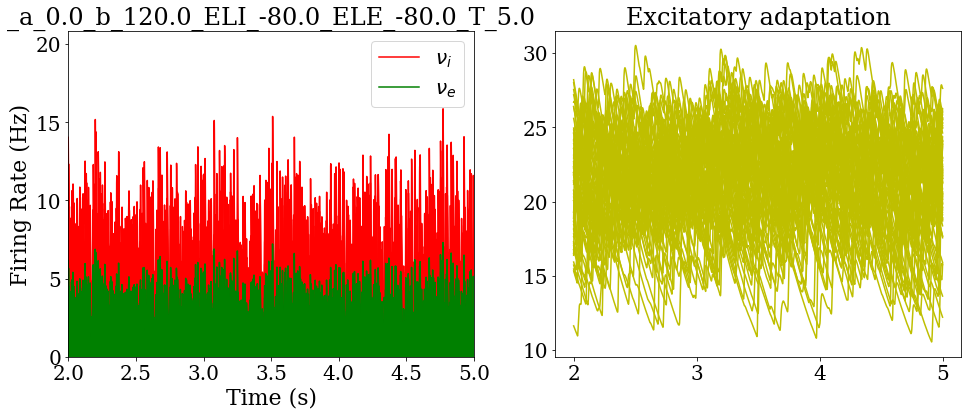

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.0_b_0.0_ELI_-60.0_ELE_-60.0_T_40.0


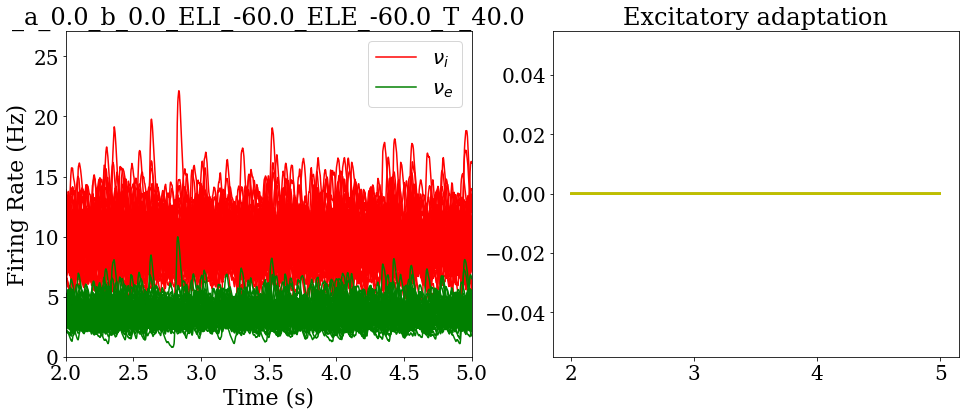

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.0_b_0.0_ELI_-60.0_ELE_-60.0_T_5.0


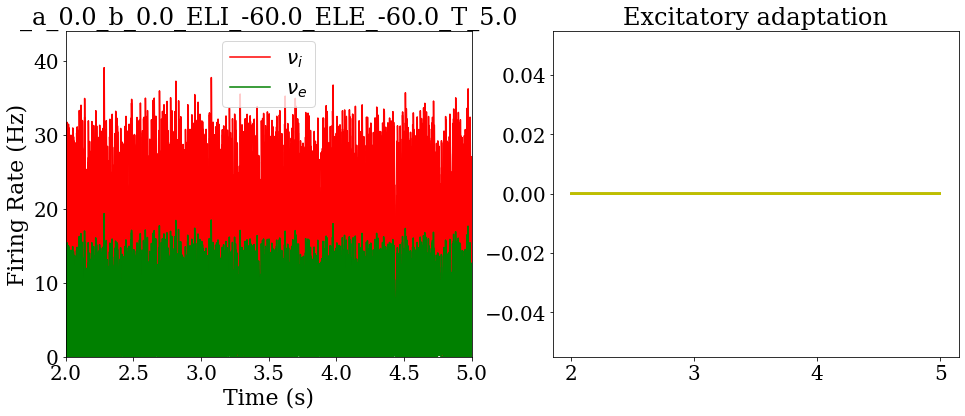

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.0_b_0.0_ELI_-60.0_ELE_-80.0_T_40.0


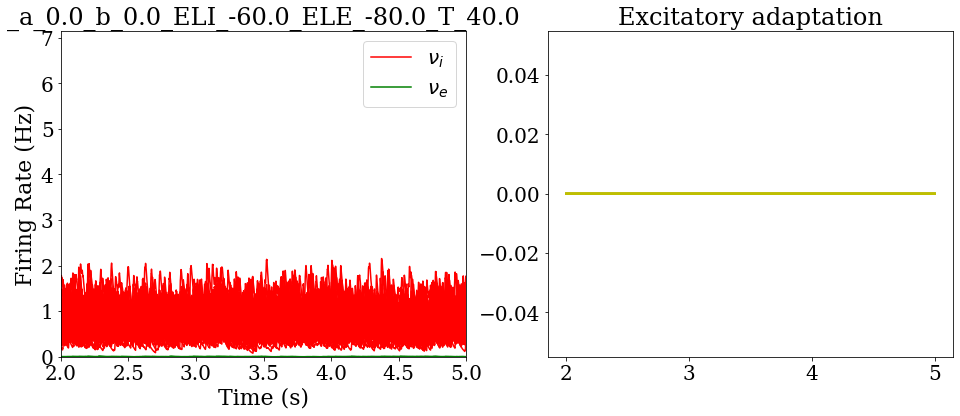

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.0_b_0.0_ELI_-60.0_ELE_-80.0_T_5.0


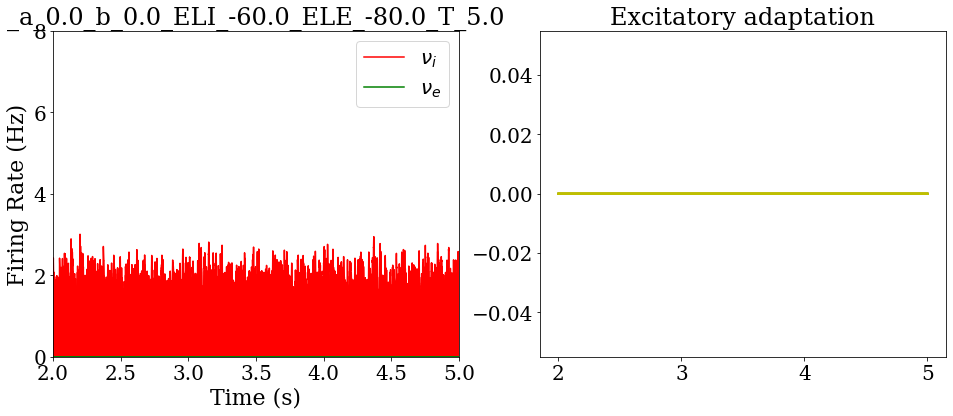

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.0_b_0.0_ELI_-80.0_ELE_-60.0_T_40.0


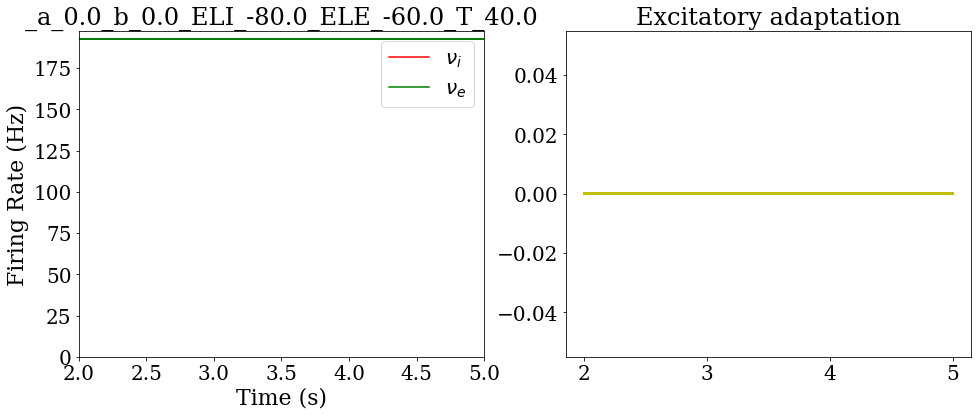

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.0_b_0.0_ELI_-80.0_ELE_-60.0_T_5.0


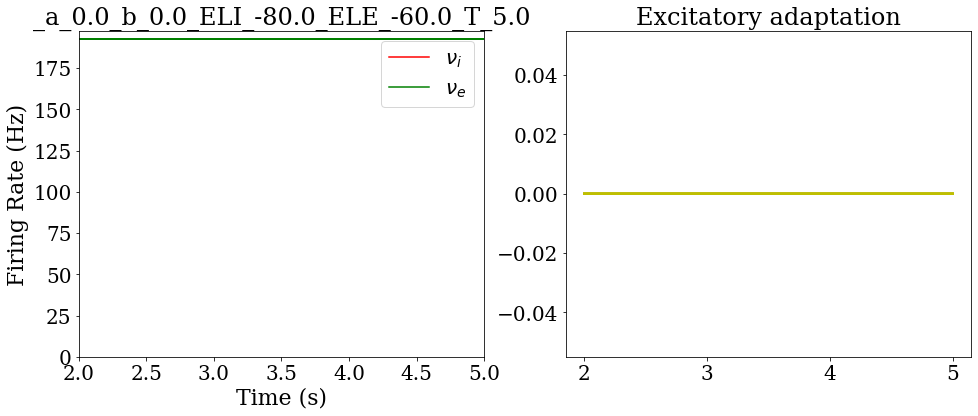

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.0_b_0.0_ELI_-80.0_ELE_-80.0_T_40.0


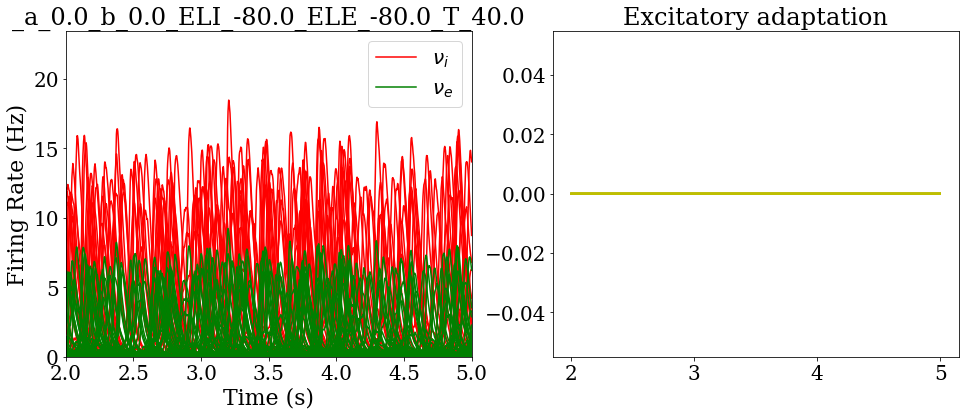

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.0_b_0.0_ELI_-80.0_ELE_-80.0_T_5.0


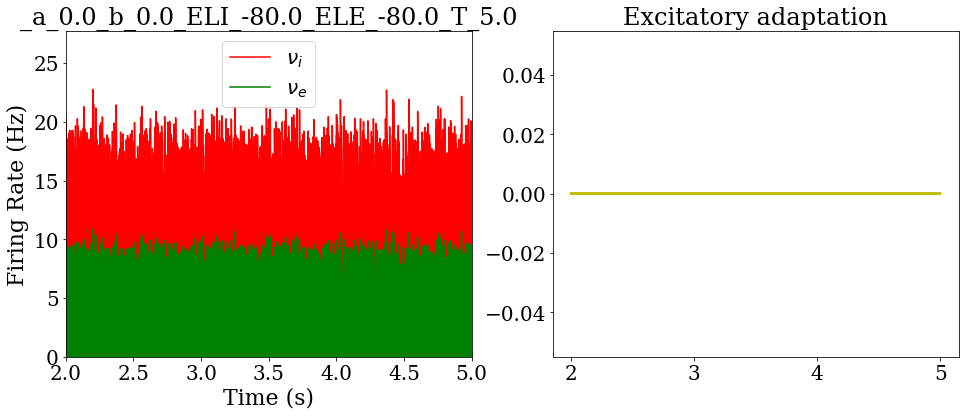

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.0_b_120.0_ELI_-60.0_ELE_-60.0_T_40.0


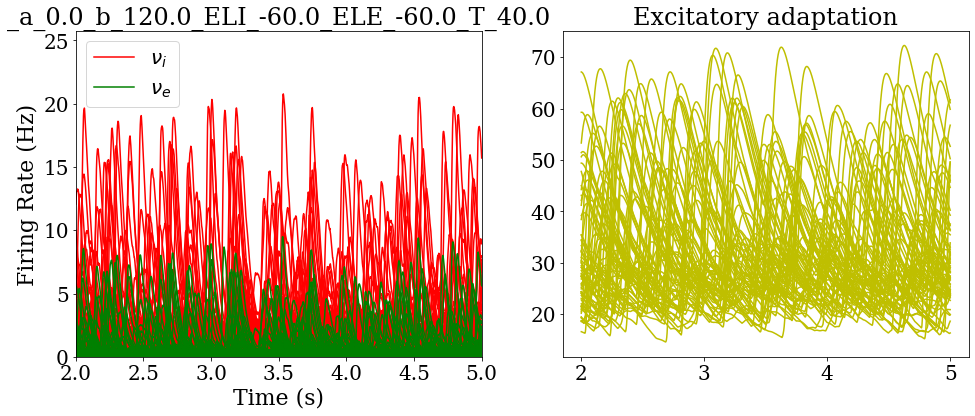

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.0_b_120.0_ELI_-60.0_ELE_-60.0_T_5.0


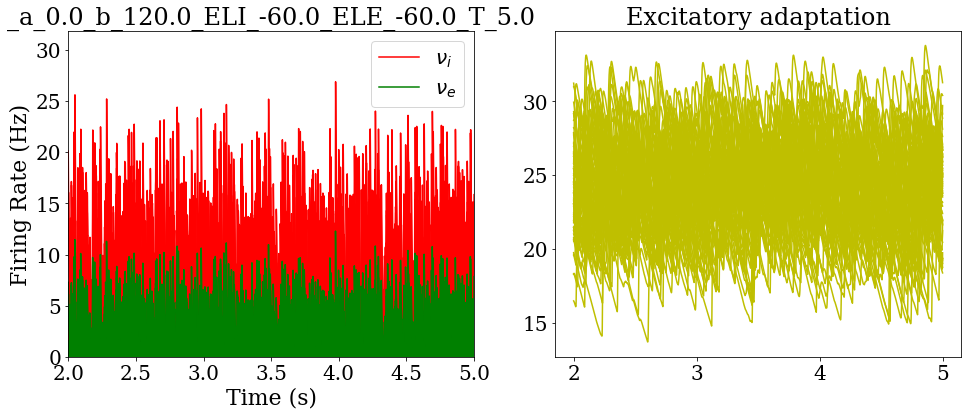

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.0_b_120.0_ELI_-60.0_ELE_-80.0_T_40.0


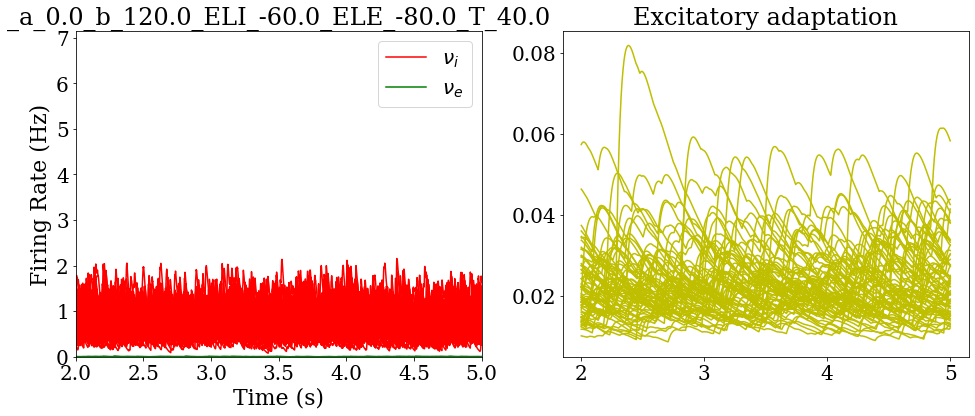

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.0_b_120.0_ELI_-60.0_ELE_-80.0_T_5.0


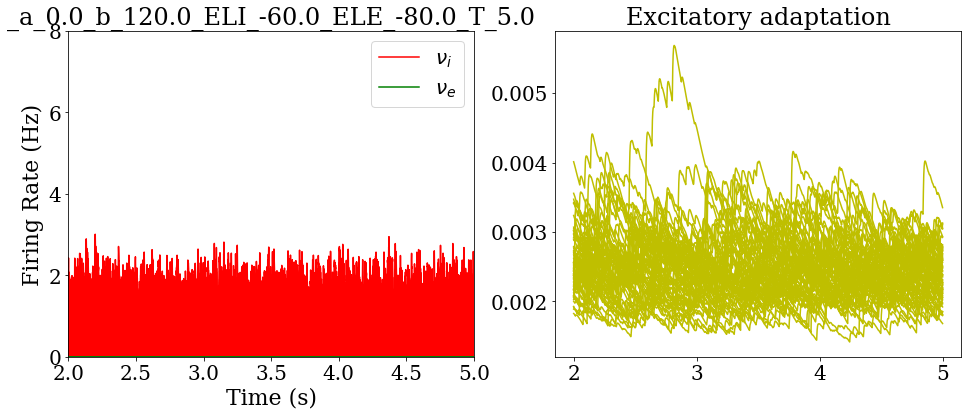

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.0_b_120.0_ELI_-80.0_ELE_-60.0_T_40.0


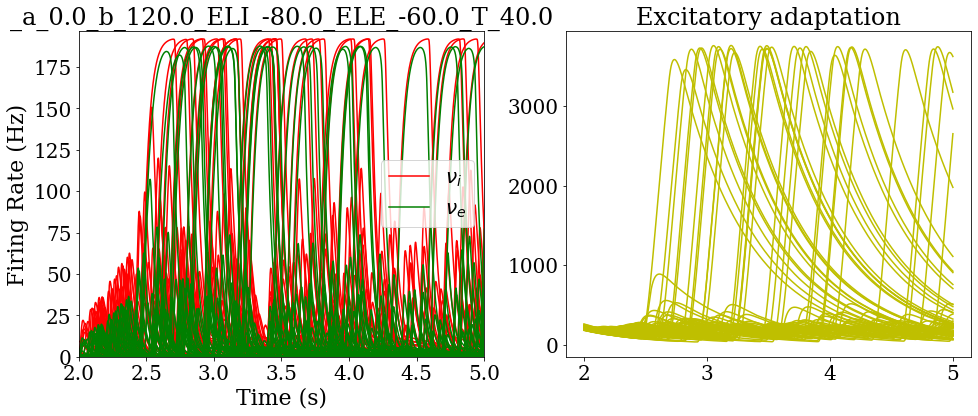

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.0_b_120.0_ELI_-80.0_ELE_-60.0_T_5.0


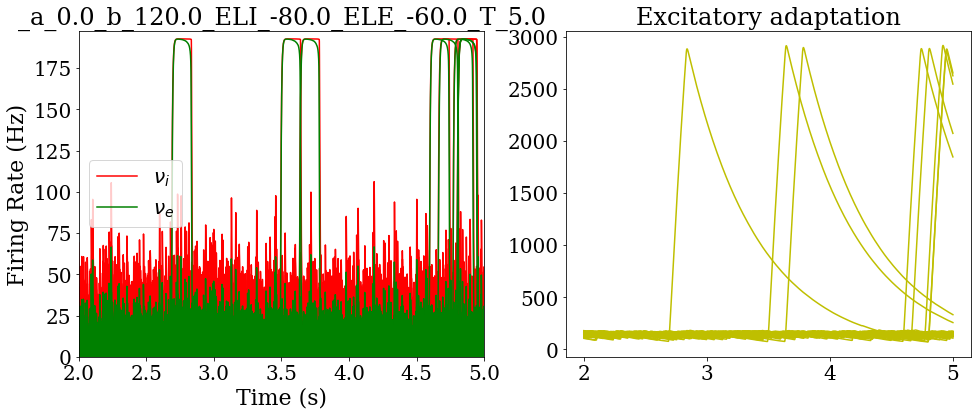

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.0_b_120.0_ELI_-80.0_ELE_-80.0_T_40.0


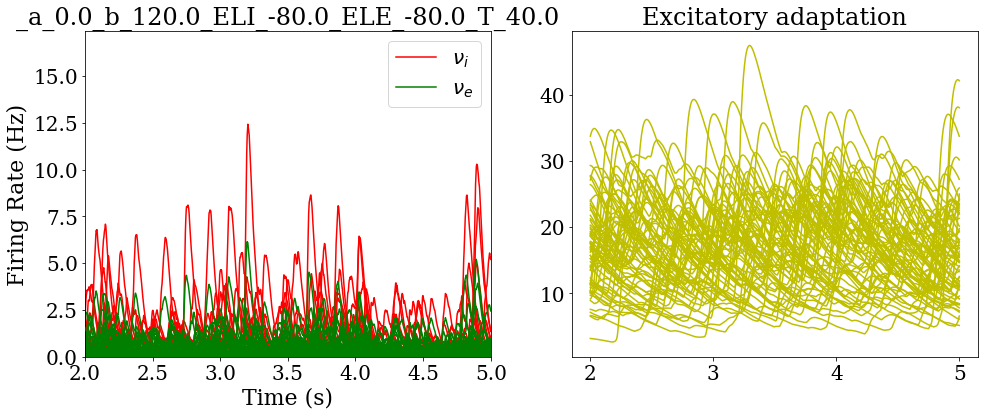

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.5_b_0.0_ELI_-60.0_ELE_-60.0_T_40.0


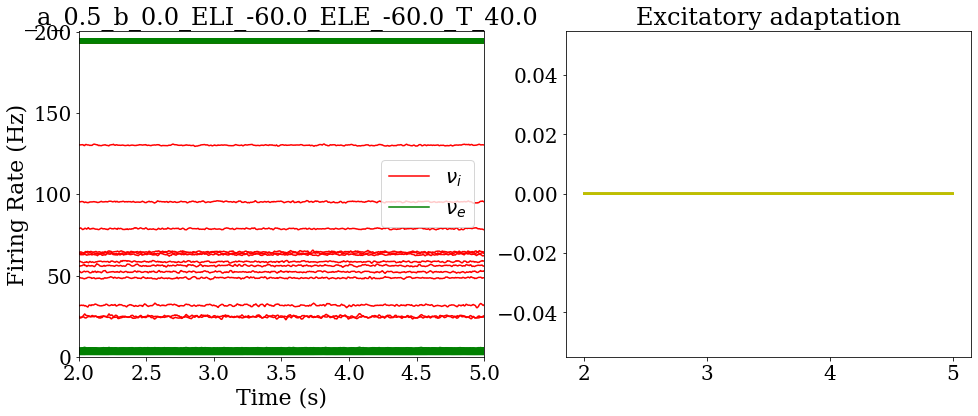

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.5_b_0.0_ELI_-60.0_ELE_-60.0_T_5.0


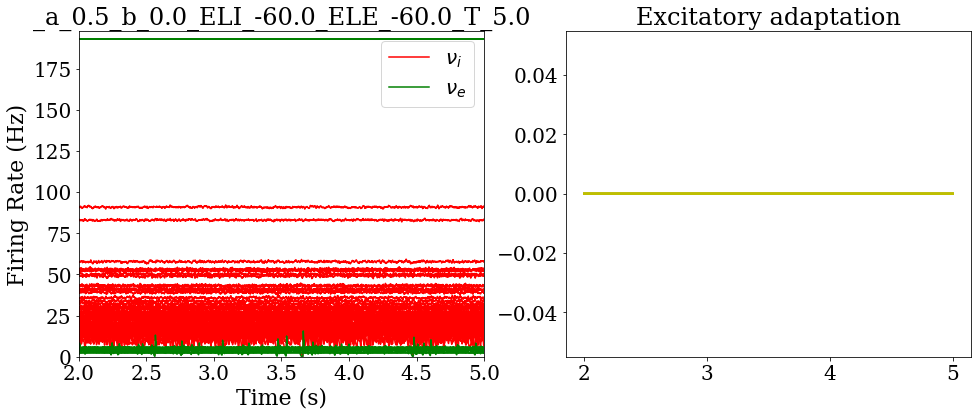

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.5_b_0.0_ELI_-60.0_ELE_-80.0_T_40.0


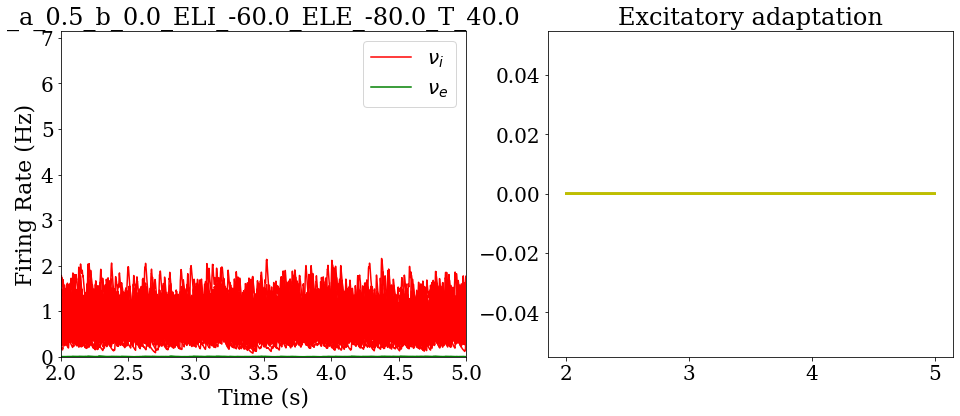

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.5_b_0.0_ELI_-60.0_ELE_-80.0_T_5.0


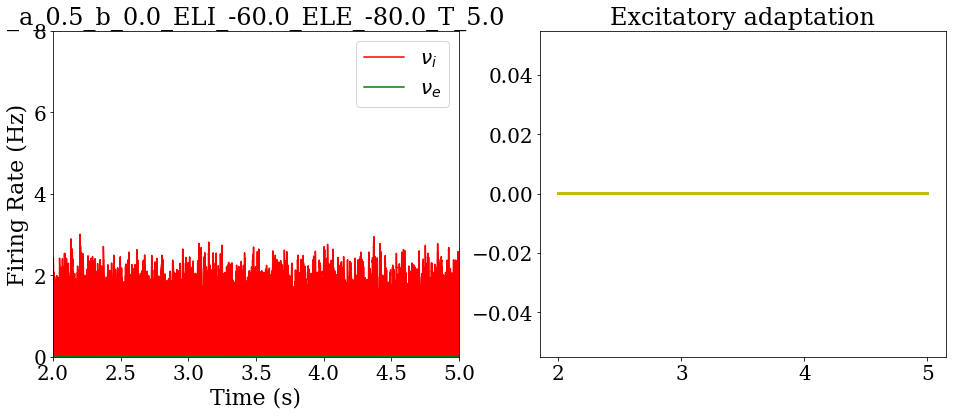

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.5_b_0.0_ELI_-80.0_ELE_-60.0_T_40.0


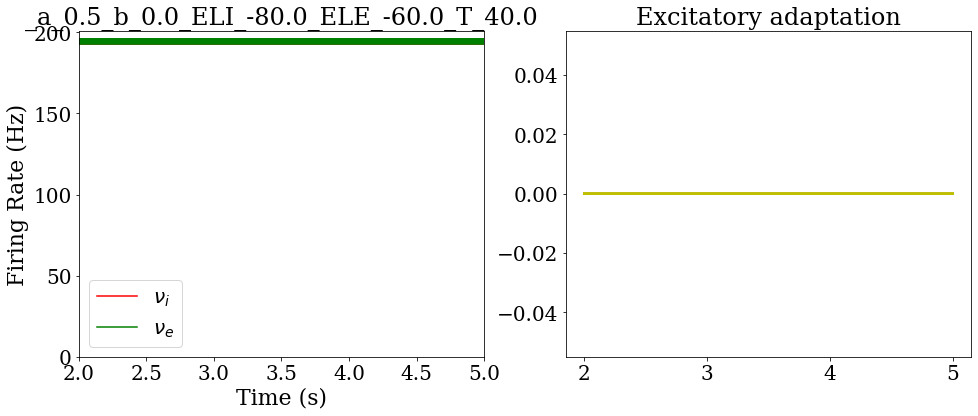

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.5_b_0.0_ELI_-80.0_ELE_-60.0_T_5.0


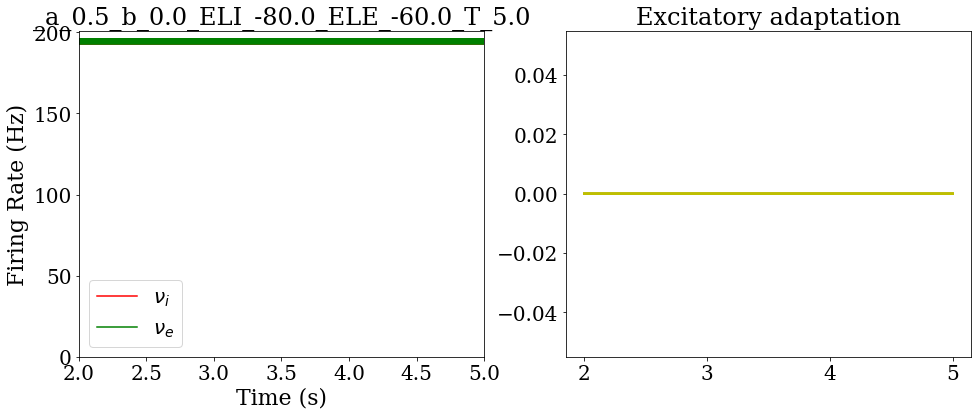

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.5_b_0.0_ELI_-80.0_ELE_-80.0_T_40.0


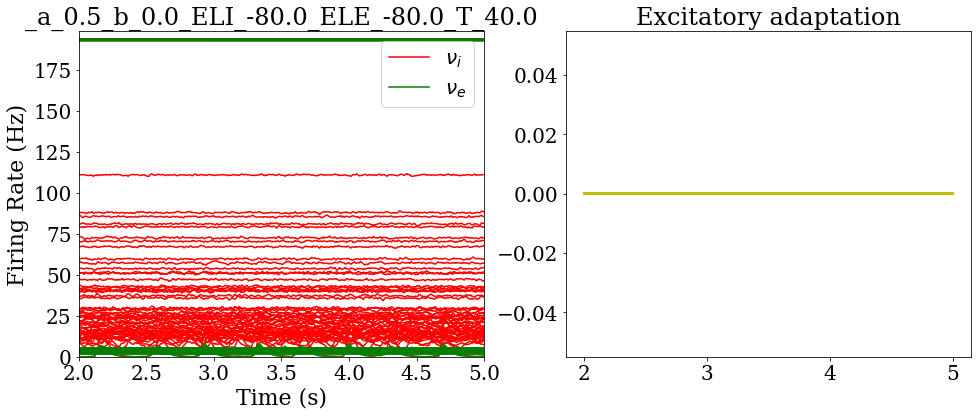

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.5_b_0.0_ELI_-80.0_ELE_-80.0_T_5.0


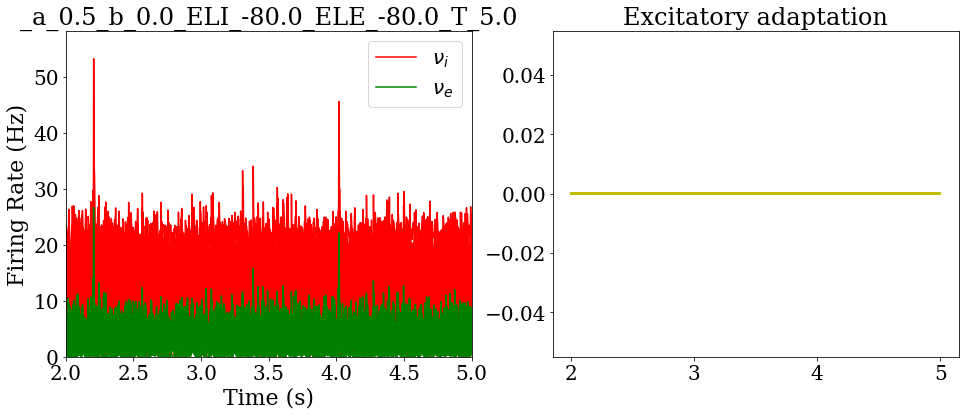

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.5_b_120.0_ELI_-60.0_ELE_-60.0_T_40.0


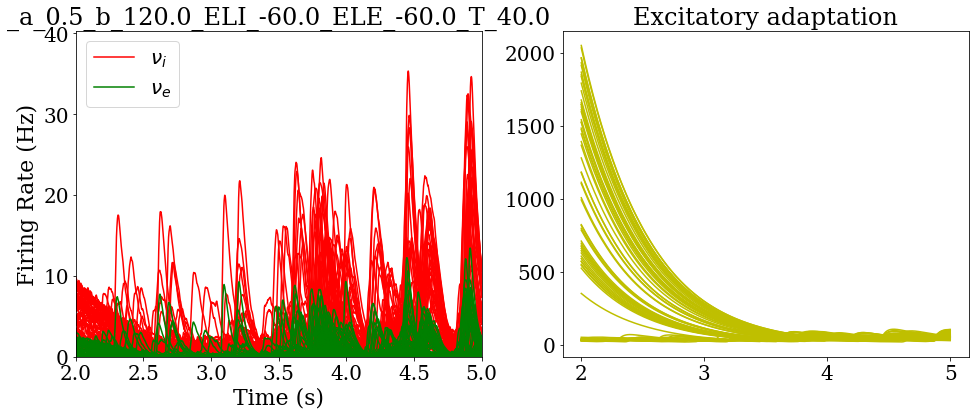

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.5_b_120.0_ELI_-60.0_ELE_-60.0_T_5.0


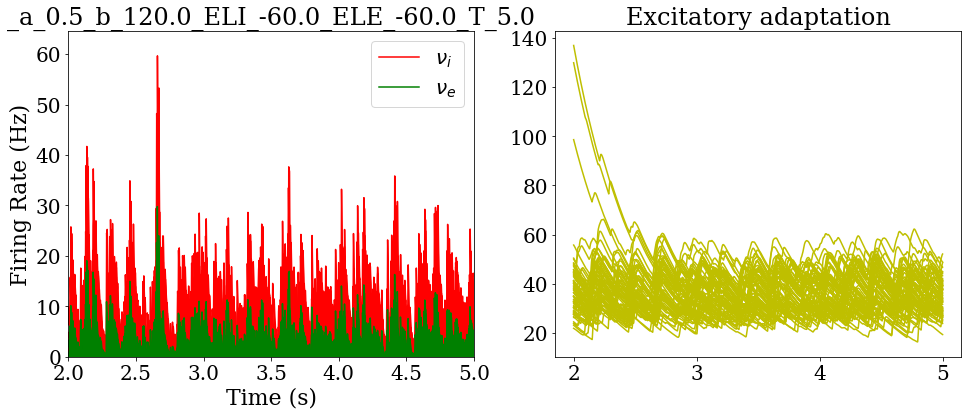

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.5_b_120.0_ELI_-60.0_ELE_-80.0_T_40.0


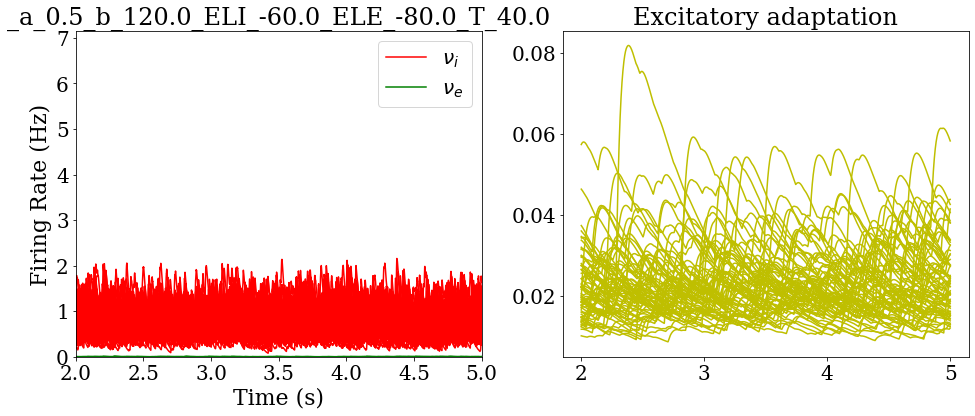

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.5_b_120.0_ELI_-60.0_ELE_-80.0_T_5.0


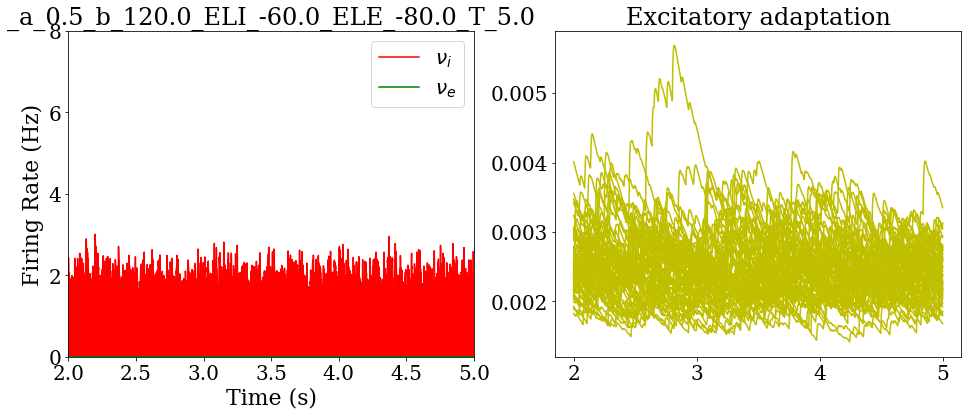

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.5_b_120.0_ELI_-80.0_ELE_-60.0_T_40.0


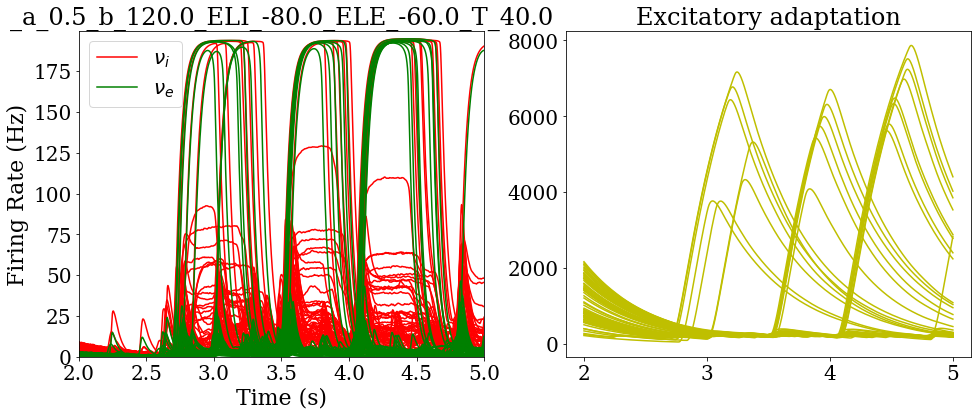

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.5_b_120.0_ELI_-80.0_ELE_-60.0_T_5.0


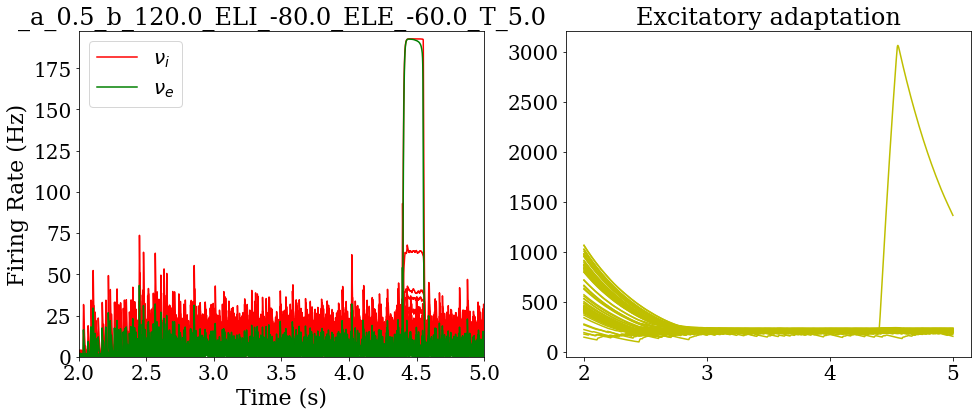

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.5_b_120.0_ELI_-80.0_ELE_-80.0_T_40.0


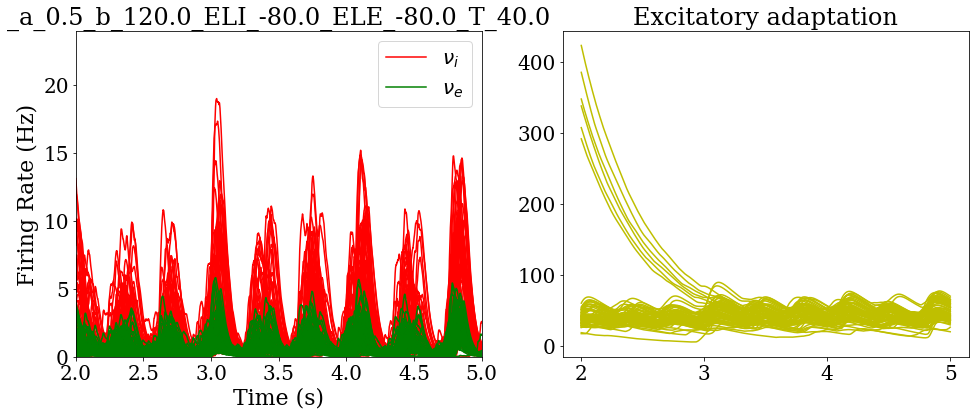

/media/master/Nuevo vol/Internship/Data/new_connectome/_a_0.5_b_120.0_ELI_-80.0_ELE_-80.0_T_5.0


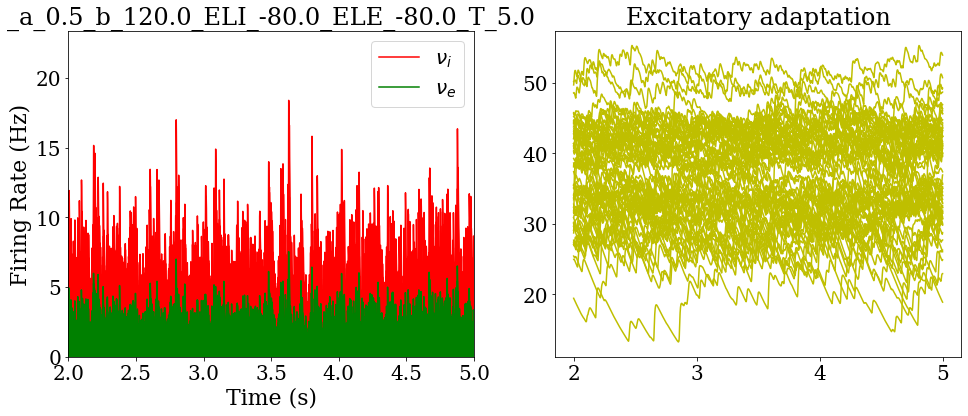

In [14]:
folder_results = '/media/master/Nuevo vol/Internship/Data/new_connectome/'
run_sim = 5000.0
cut_transient = 2000.0

for file in os.scandir(folder_results):
    # Then the sweeps
    print(file.path)
    name = file.name
    result = tools.get_result(file.path, cut_transient, run_sim)
    time_s = result[0][0] * 1e-3  # from ms to sec

    # Decide which one to analyze since they usually exhibit very similar behavior
    FR_exc = result[0][1][:, 0, :] * 1e3  # from KHz to Hz; Excitatory firing rate
    FR_inh = result[0][1][:, 1, :] * 1e3  # from KHz to Hz; Inhibitory firing rate
    W = result[0][1][:, 5, :]

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    ax = axes[0]
    ax.plot(time_s, FR_inh[:], c='r')
    ax.plot(time_s, FR_exc[:], c='g')
    ax.plot([], [], label='$\\nu_i$', c='r')
    ax.plot([], [], label='$\\nu_e$', c='g')
    ax.legend(loc='best')
    ax.set(title=name, xlabel='Time (s)', ylabel='Firing Rate (Hz)',
           xlim=(2, 5), ylim=(0, 5 + max([np.amax(FR_exc), np.amax(FR_inh)])))
    ax = axes[1]
    ax.plot(time_s, W[:], c='y')
    ax.set_title('Excitatory adaptation')

    plt.show()

# Plots for infinite axon speed

In [17]:
ELS_vals = [[-64, -64], [-78.667, -80]]
b_list = [0, 40, 80, 120]

ELS_A = [0]
T_list = [19]
a_list = [0.4]
lst1 = [T_list, a_list, ELS_A, b_list]
combinaison1 = list(itertools.product(*lst1))
print(combinaison1)

ELS_B = [0]
T_list = [26]
a_list = [0.4]
lst2 = [T_list, a_list, ELS_B, b_list]
combinaison2 = list(itertools.product(*lst2))
print(combinaison2)

ELS_C = [1]
T_list = [19]
a_list = [0.5]
lst3 = [T_list, a_list, ELS_C, b_list]
combinaison3 = list(itertools.product(*lst3))
print(combinaison3)
combinations = [combinaison1, combinaison2, combinaison3]

[(19, 0.4, 0, 0), (19, 0.4, 0, 40), (19, 0.4, 0, 80), (19, 0.4, 0, 120)]
[(26, 0.4, 0, 0), (26, 0.4, 0, 40), (26, 0.4, 0, 80), (26, 0.4, 0, 120)]
[(19, 0.5, 1, 0), (19, 0.5, 1, 40), (19, 0.5, 1, 80), (19, 0.5, 1, 120)]


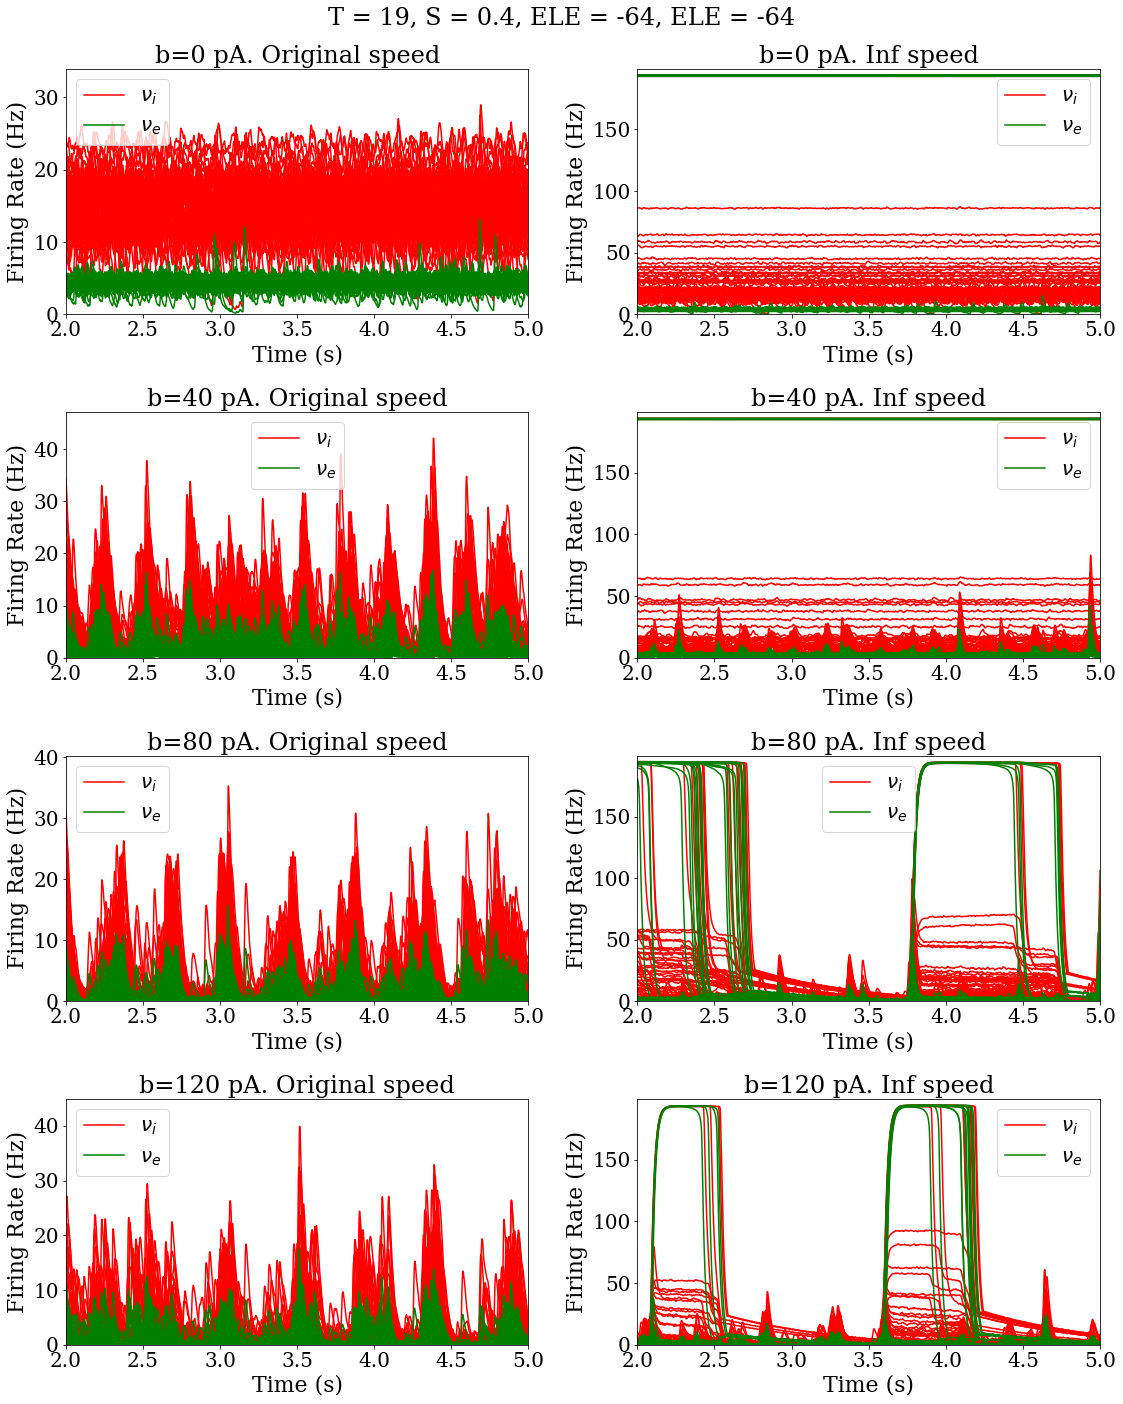

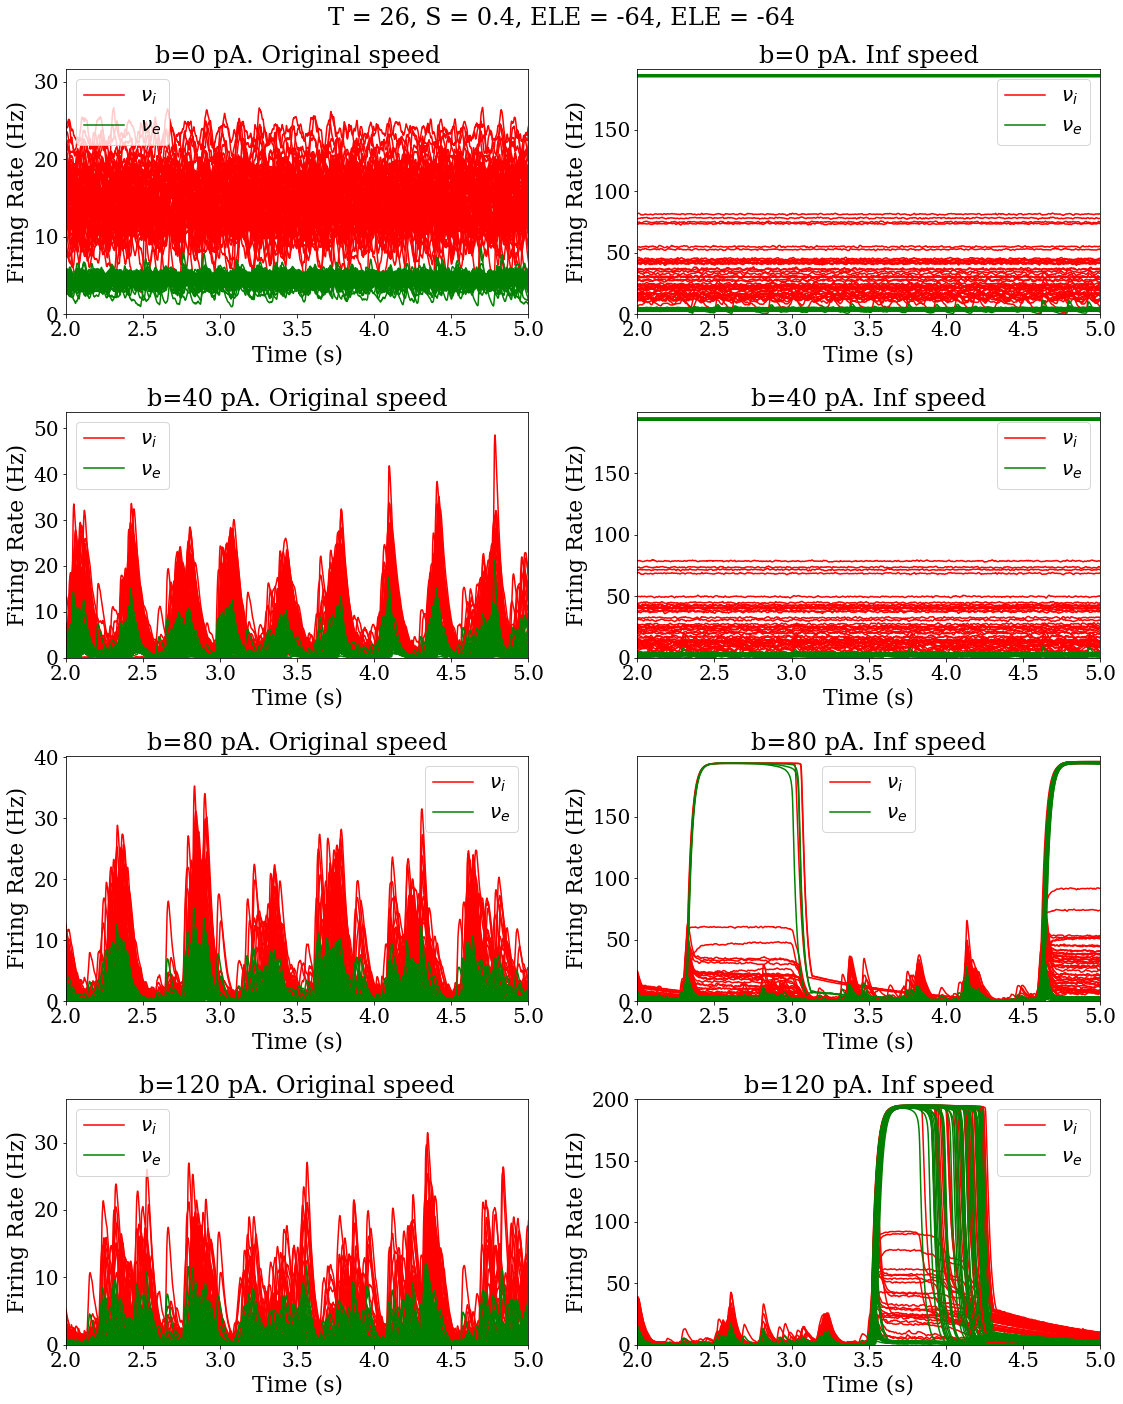

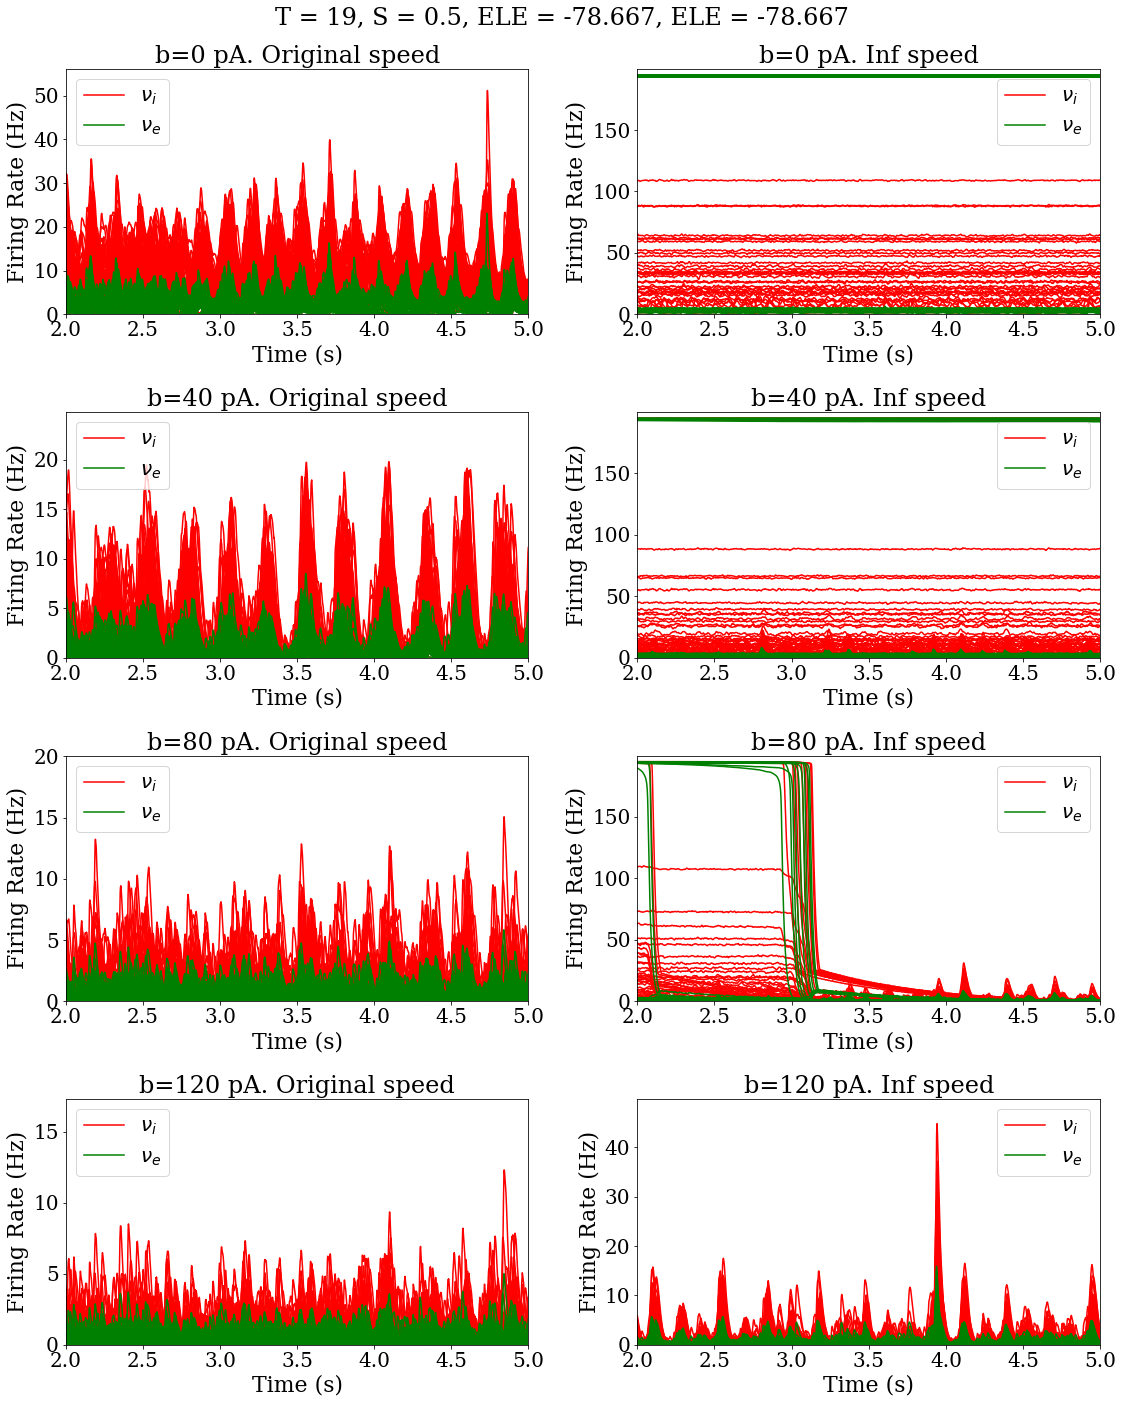

In [22]:
run_sim = 5000.0
cut_transient = 2000.0

folder_root_or = '/media/master/Nuevo vol/Internship/Data/inf_speed/speed4/'
folder_root_inf = '/media/master/Nuevo vol/Internship/Data/inf_speed/speed1e16/'

for list_combination in combinations:
    fig, axes = plt.subplots(4, 2, figsize=(16, 20))
    comb = list_combination[0]
    suptitle = f'T = {comb[0]}, S = {comb[1]}, ELE = {ELS_vals[comb[2]][0]}, ELE = {ELS_vals[comb[2]][0]}'
    fig.suptitle(suptitle)
    for ax_row, combination in enumerate(list_combination):
        T = combination[0]
        a = combination[1]
        E_L_i = ELS_vals[combination[2]][0]
        E_L_e = ELS_vals[combination[2]][1]
        b = combination[3]
        label_sim = '_a_' + str(a) + '_ELI_' + \
                    str(E_L_i) + '_ELE_' + str(E_L_e) + '_T_' + str(T) + '_b_' + str(b) + '/'

        # First plot original one
        file_name = folder_root_or + label_sim

        result = tools.get_result(file_name, cut_transient, run_sim)
        time_s = result[0][0] * 1e-3  # from ms to sec

        # Decide which one to analyze since they usually exhibit very similar behavior
        FR_exc = result[0][1][:, 0, :] * 1e3  # from KHz to Hz; Excitatory firing rate
        FR_inh = result[0][1][:, 1, :] * 1e3  # from KHz to Hz; Inhibitory firing rate

        ax = axes[ax_row, 0]
        ax.plot(time_s, FR_inh[:], c='r')
        ax.plot(time_s, FR_exc[:], c='g')
        ax.plot([], [], label='$\\nu_i$', c='r')
        ax.plot([], [], label='$\\nu_e$', c='g')
        ax.legend(loc='best')
        ax.set(title=f'b={b} pA. Original speed', xlabel='Time (s)', ylabel='Firing Rate (Hz)',
               xlim=(2, 5), ylim=(0, 5 + max([np.amax(FR_exc), np.amax(FR_inh)])))
        
        # Then plot very fast one
        file_name = folder_root_inf + label_sim

        result = tools.get_result(file_name, cut_transient, run_sim)
        time_s = result[0][0] * 1e-3  # from ms to sec

        # Decide which one to analyze since they usually exhibit very similar behavior
        FR_exc = result[0][1][:, 0, :] * 1e3  # from KHz to Hz; Excitatory firing rate
        FR_inh = result[0][1][:, 1, :] * 1e3  # from KHz to Hz; Inhibitory firing rate

        ax = axes[ax_row, 1]
        ax.plot(time_s, FR_inh[:], c='r')
        ax.plot(time_s, FR_exc[:], c='g')
        ax.plot([], [], label='$\\nu_i$', c='r')
        ax.plot([], [], label='$\\nu_e$', c='g')
        ax.legend(loc='best')
        ax.set(title=f'b={b} pA. Inf speed', xlabel='Time (s)', ylabel='Firing Rate (Hz)',
               xlim=(2, 5), ylim=(0, 5 + max([np.amax(FR_exc), np.amax(FR_inh)])))
        
    plt.tight_layout()
    plt.show()